# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2023
## Домашнее задание 4. Линейные модели
### Мягкий дедлайн --- 25.11 23:59
### Жесктий дедлайн --- 30.11 16:59

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.


В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека `scipy.stats`. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook c:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде,
* собственно кодом,
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

In [118]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(font_scale=1.4, style='whitegrid')
%config InlineBackend.figure_format='retina'

В учебных целях в первой задаче запрещено использовать готовые реализации линейной регрессии (например, из пакета *scikit-learn*).

## Задача 1 (10 баллов)

На полигоне испытывается новая модель трамвая. В одном из испытании работы двигателя проверяется, что движение трамвая равномерно. Для проведения теста на трамвай установлен датчик, посекундно измеряющий пройденное расстояние.

Записи датчика можно описать такой моделью:

 $$X_i = \beta_1+i\beta_2+\varepsilon_0+\ldots+\varepsilon_i,\, i= 0, 1, \ldots, n$$

где $X_i$ --- расстояние, которое проехал трамвай за $i$ секунд. В модели $\beta_1$ --- начальное расстояние, $\beta_2$ --- скорость трамвая, $\varepsilon_0$ --- ошибка начального показания датчика. Отсчет времени идет от предыдущего замера, причем отсчет происходит с ошибкой. Для $i = 1, \ldots, n$ величина $\varepsilon_i$ есть ошибка приращения расстояния, то есть $\varepsilon_i = \varepsilon_i^t \beta_2,$ где $\varepsilon_i^t$ --- ошибка отсчета времени. Все ошибки $\varepsilon_i^t$ независимы и распределены по закону $N(0, \sigma^2)$.

Сведите задачу к линейной модели и найдите оценки наименьших квадратов для начального расстояния $\beta_1$ и скорости $\beta_2,$ а также несмещенную оценку для $\sigma^2,$ из которой выразите оценку дисперсии отсчета времени.

Данные возьмите из файла Regression.csv. Сделайте выводы.

### Решение

Загрузим датасет, содержащий показания датчика.

In [119]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1pJSA_OGMHu2Ks__Wqf0digi3RAz7Wg7J

Downloading...
From: https://drive.google.com/uc?id=1pJSA_OGMHu2Ks__Wqf0digi3RAz7Wg7J
To: C:\Users\natas\PycharmProjects\math_stat_homework\regression.csv

  0%|          | 0.00/9.98k [00:00<?, ?B/s]
100%|##########| 9.98k/9.98k [00:00<00:00, 639kB/s]


Датасет состоит из 1000 измерений. По смыслу средняя скорость имеет размерность метры в секунду.

In [120]:
X = np.genfromtxt('regression.csv')
print('Размер датасета:', X.shape)
print('Средняя скорость:', X[-1] / X.shape[0])

Размер датасета: (1000,)
Средняя скорость: 12.0408175


Визуализируйте выборку и сделайте выводы о том, верно ли что линейная регрессионная модель имеет смысл

In [121]:
X

array([   82.0053,    93.8427,   106.7281,   120.4825,   132.7421,
         146.4281,   157.5309,   170.5886,   182.2967,   194.8899,
         206.6162,   217.6788,   228.7344,   237.8614,   252.2755,
         262.7107,   276.3518,   288.3686,   301.688 ,   312.5419,
         325.4289,   336.491 ,   346.4938,   358.4925,   368.683 ,
         381.1091,   393.1667,   403.9282,   416.3808,   427.6759,
         439.2691,   451.7218,   464.745 ,   477.0656,   487.9142,
         498.5641,   511.6938,   525.4896,   538.2132,   552.7938,
         564.9022,   579.1516,   592.3386,   604.9886,   616.8087,
         627.7796,   640.697 ,   650.2103,   662.2532,   674.2745,
         685.8238,   698.5721,   711.9092,   724.425 ,   735.8761,
         749.3817,   762.1523,   774.3078,   788.1159,   799.2806,
         810.5266,   821.5607,   833.3399,   845.1802,   857.84  ,
         869.9825,   881.6557,   892.059 ,   903.3783,   915.0518,
         927.0816,   936.9797,   948.5571,   960.4205,   971.2

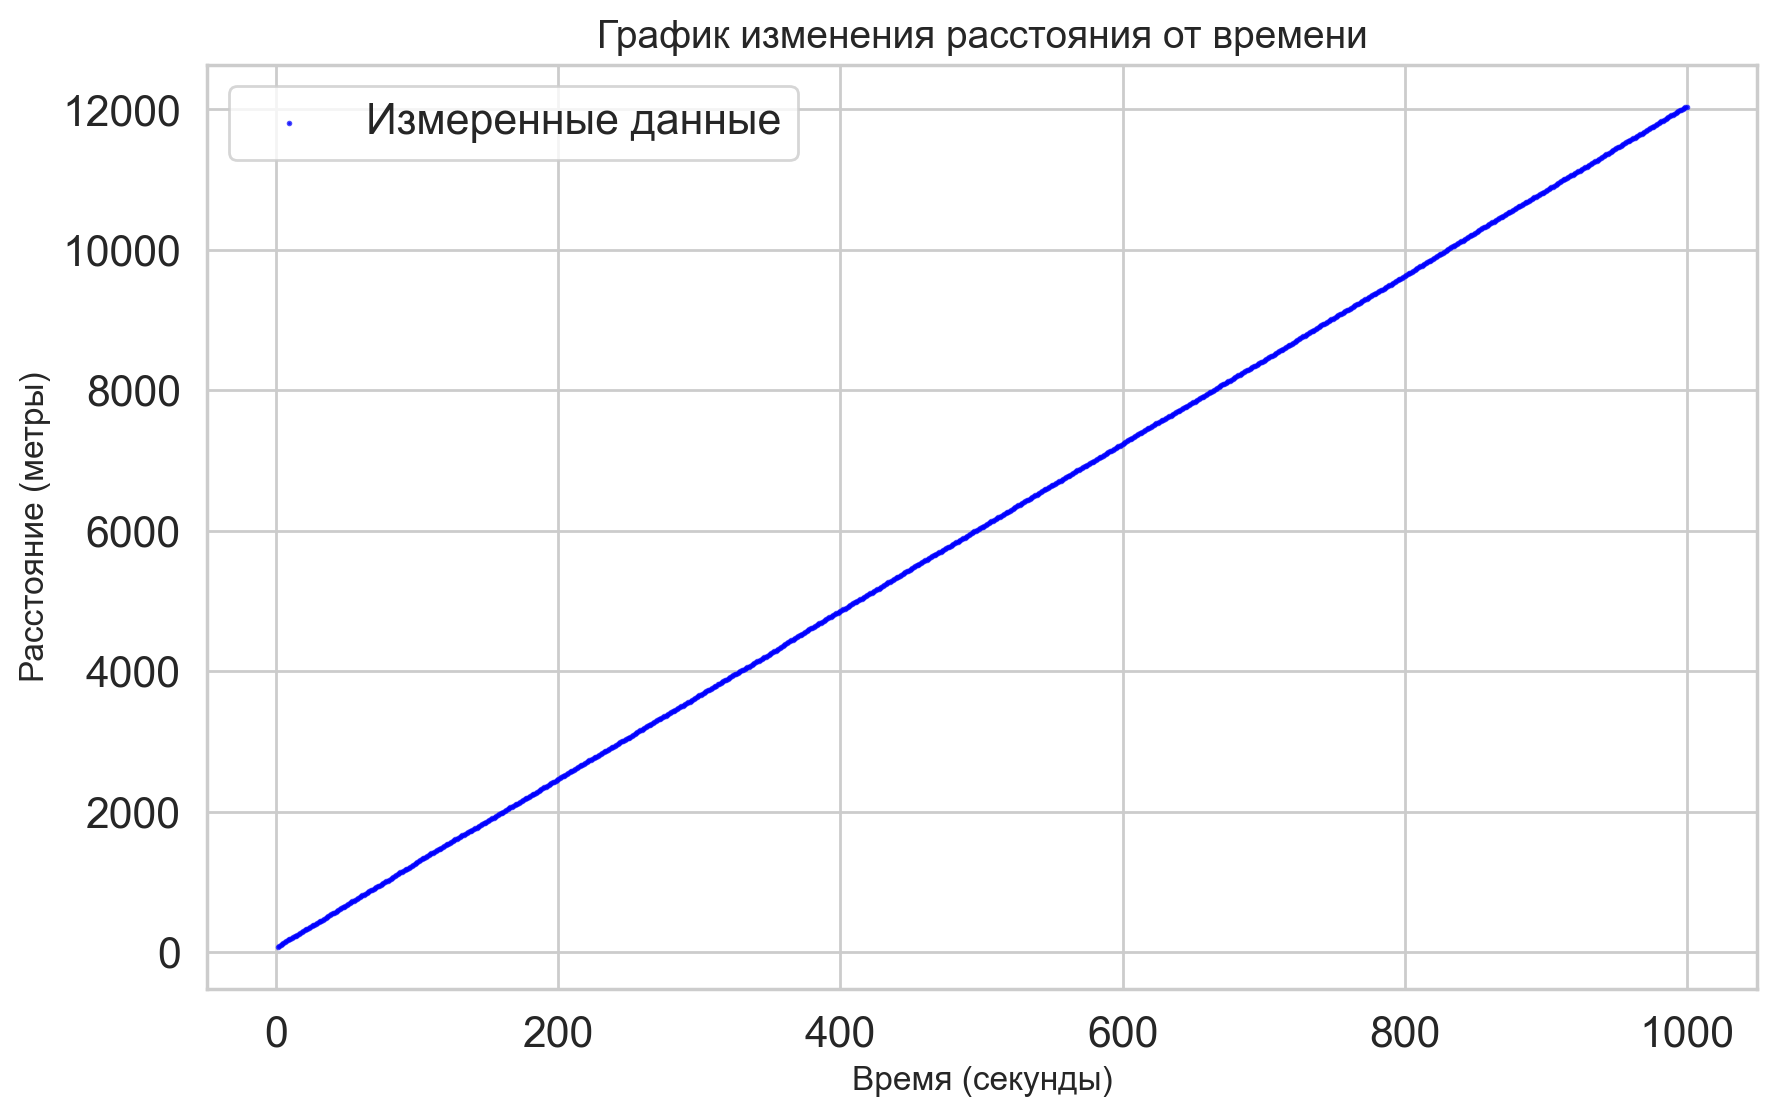

In [122]:
n = len(X)
t = np.arange(1, n + 1)  

plt.figure(figsize=(10, 6))
plt.scatter(t, X, label='Измеренные данные', color='blue', alpha=0.7, s=1)
plt.title('График изменения расстояния от времени', fontsize=14)
plt.xlabel('Время (секунды)', fontsize=12)
plt.ylabel('Расстояние (метры)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

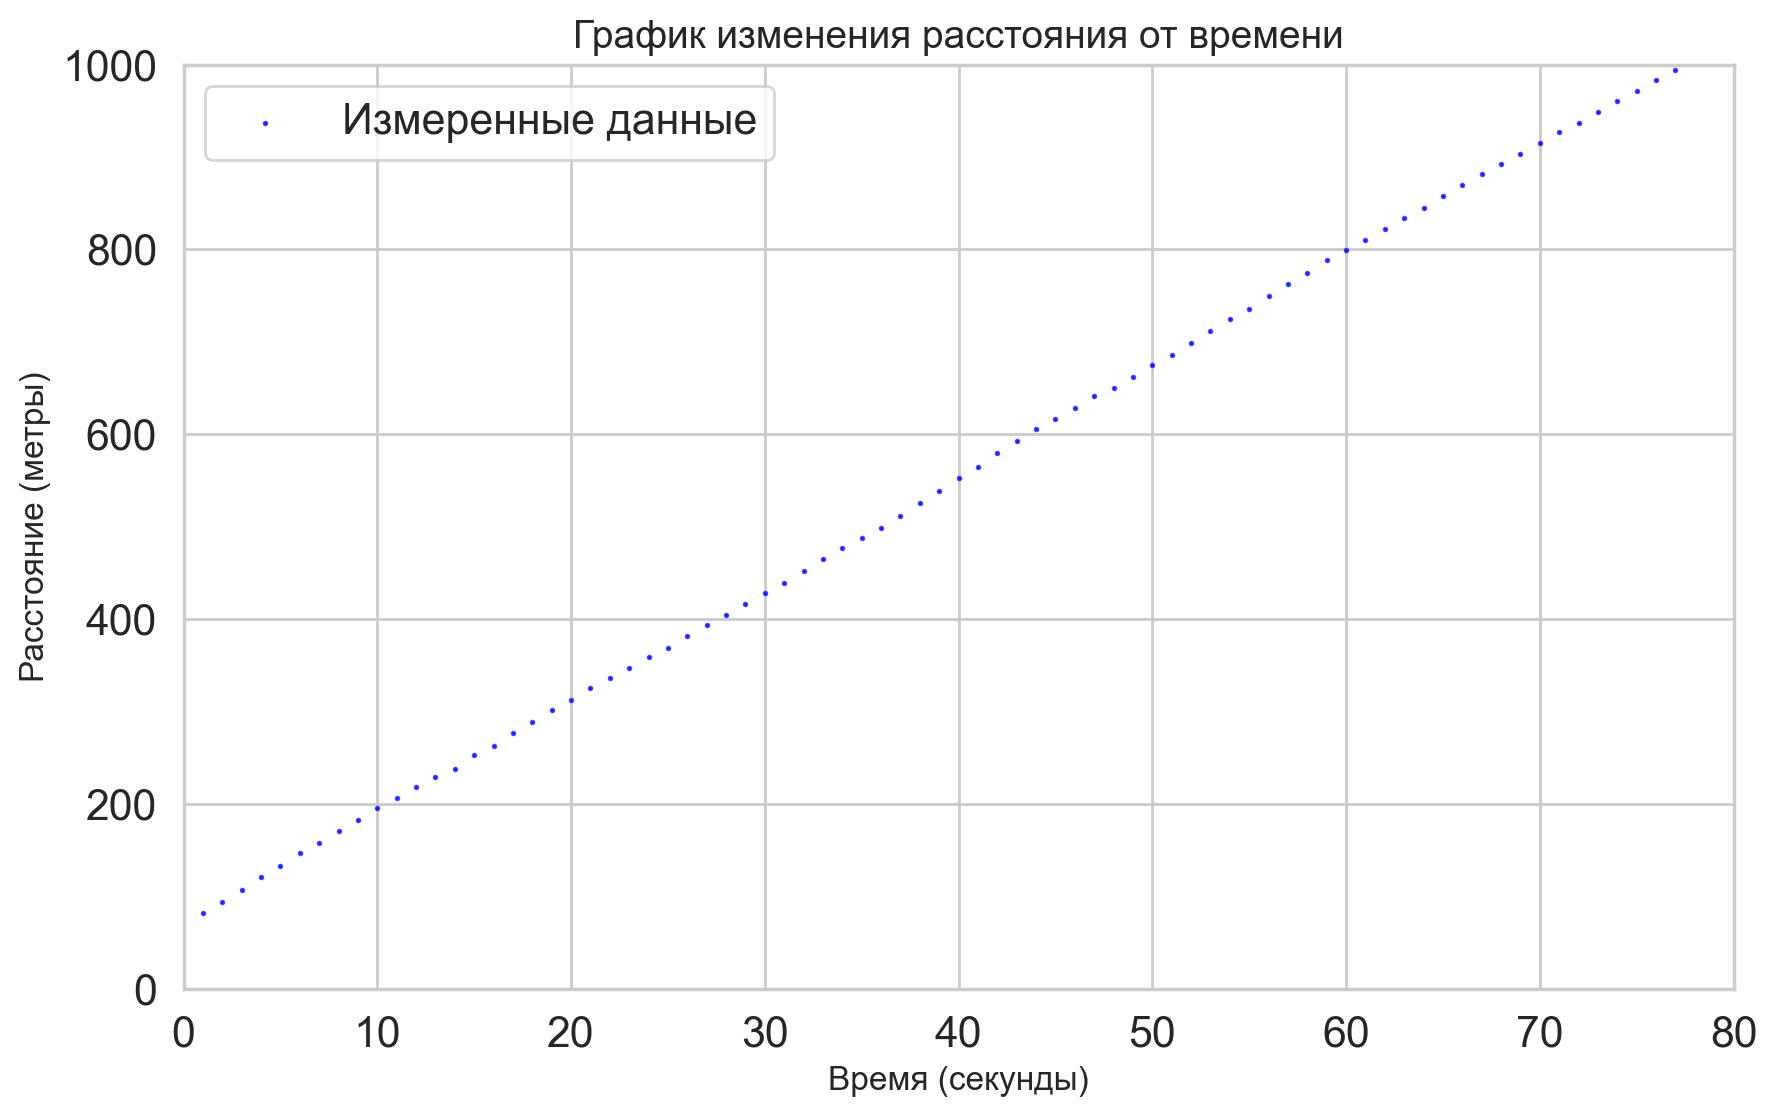

In [123]:
n = len(X)
t = np.arange(1, n + 1) 

plt.figure(figsize=(10, 6))
plt.scatter(t, X, label='Измеренные данные', color='blue', alpha=0.7, s=1)
plt.title('График изменения расстояния от времени', fontsize=14)
plt.xlabel('Время (секунды)', fontsize=12)
plt.ylabel('Расстояние (метры)', fontsize=12)
plt.xlim(0, 80) 
plt.ylim(0, 1000)
plt.grid(True)
plt.legend()
plt.show()

На первом графике я изобразила все элементы из X, по оси x время в секундах, по оси y измерения расстояния (сами значения X), а на втором графике я выделила фрагмент графика, чтобы было визуально были видны точки. 
Из графиков можно сделать вывод, что линейная регрессионная модель имеет смысл (так как можно "провести линию"). 

#### 1. Сведите задачу к гауссовской линейной модели (определения брать из основного курса)

Нам известно, что $X = (X_0, X_1, \ldots X_n)^T$

Введу такое новое измерение $X^{\star} = (X_0, X_1 - X_0, X_2 - X_1, \ldots, X_n - X_{n-1})^T$ и буду рассматривать его вместо $X$.

$X_0 = \beta_1 + \varepsilon_{0}$.

$X_{i+1} - X_i = \beta_2 + \varepsilon_i, \varepsilon_i \sim \mathcal{N}(0, \sigma^2)$. То есть получаем, что $X^{\star} = (\beta_1 + \varepsilon_0, \beta_2 + \varepsilon_1, \ldots, \beta_2 + \varepsilon_n)^T$.

Представлю $X^{\star}$ следующий образом: $X^{\star} = Z\theta + \varepsilon$, где $ \varepsilon = (\varepsilon_1, \ldots, \varepsilon_n)$, $\theta = (\beta_1, \beta_2)^T$, $Z = [[1, 0], [0, 1], [0, 1], ..., [0, 1]]$



С помощью МНК оценю $\hat{\theta} = (Z^T Z)^{-1}Z^TX^{\star}$

Посчитаю несмещенную оценку для $\sigma^2:$ $\hat{\sigma^2 }= \frac{1}{n + 1 - 2} \| X^{\star} - Z \hat{\theta} \|^2$


In [124]:
import numpy as np
from numpy import linalg

X_star = np.zeros(n + 1)
X_star[0] = X[0]  
X_star[1:n] = X[1:] - X[:-1]  

Z = np.zeros((n + 1, 2))
Z[0, 0] = 1  
Z[1:, 1] = 1 

theta_hat = np.linalg.inv(Z.T @ Z) @ Z.T @ X_star  
beta_1_hat, beta_2_hat = theta_hat

residuals = X_star - Z @ theta_hat 
sigma_squared_hat = (linalg.norm(X_star - Z @ theta_hat ) ** 2) / (n + 1 - 2)

print(f"Оценка начального расстояния: {beta_1_hat:.4f}")
print(f"Оценка скорости: {beta_2_hat:.4f}")
print(f"Несмещенная оценка дисперсии ошибки: {sigma_squared_hat:.4f}")


Оценка начального расстояния: 82.0053
Оценка скорости: 11.9588
Несмещенная оценка дисперсии ошибки: 1.6670


#### 2. Найдите оценку параметров

Укажите, чему равна матрица (Z в терминах методички) в задаче: $Z = [[1, 0], [0, 1], [0, 1], ..., [0, 1]]$

И найдите параметры $\beta_1$, $\beta_2$ 

 $\theta = (\beta_1, \beta_2)^T$ Из этого находятся $\beta_1, \beta_2$. 
 
Сам код я написала выше.

*Ошибкой* или *остатком* называют разность между наблюдаемым значением целевой величины и предсказанием модели на основе соответствующих признаков. Проверьте, насколько точна модель при помощи подсчёта ошибок. Выведите сами ошибки на график и проанализируйте его.

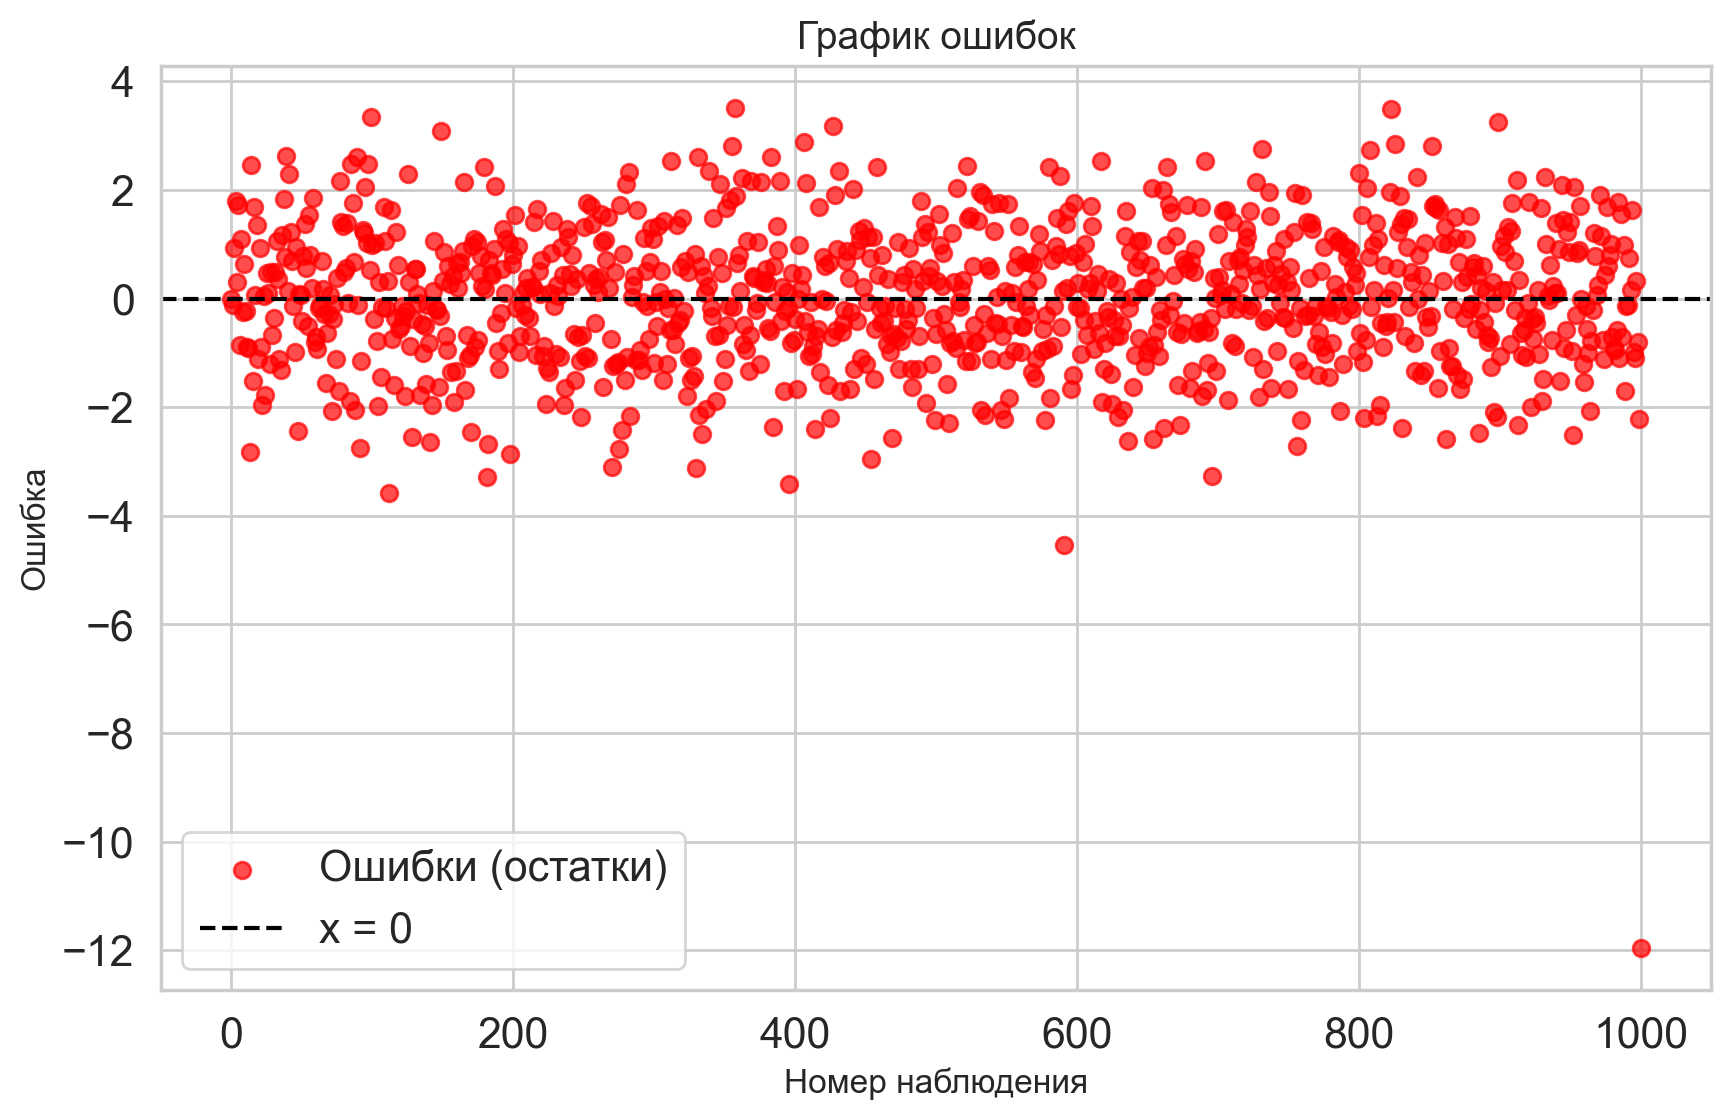

In [125]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.7, label='Ошибки (остатки)', color='red')
plt.axhline(y=0, color='black', linestyle='dashed', label='x = 0')
plt.title('График ошибок', fontsize=14)
plt.xlabel('Номер наблюдения', fontsize=12)
plt.ylabel('Ошибка', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

Ошибки достаточно равномерно распределены вокруг прямой y=0, однако есть заметный выброс. Так же нет никаких закономерностей в распределении ошибок, поэтому можно сказать, что модель линейной регрессии подходит для этих данных. 

Проверьте, что ошибка нормальна. Для этого можно использовать QQ-plot. Если хотите, можете использовать критерии нормальности

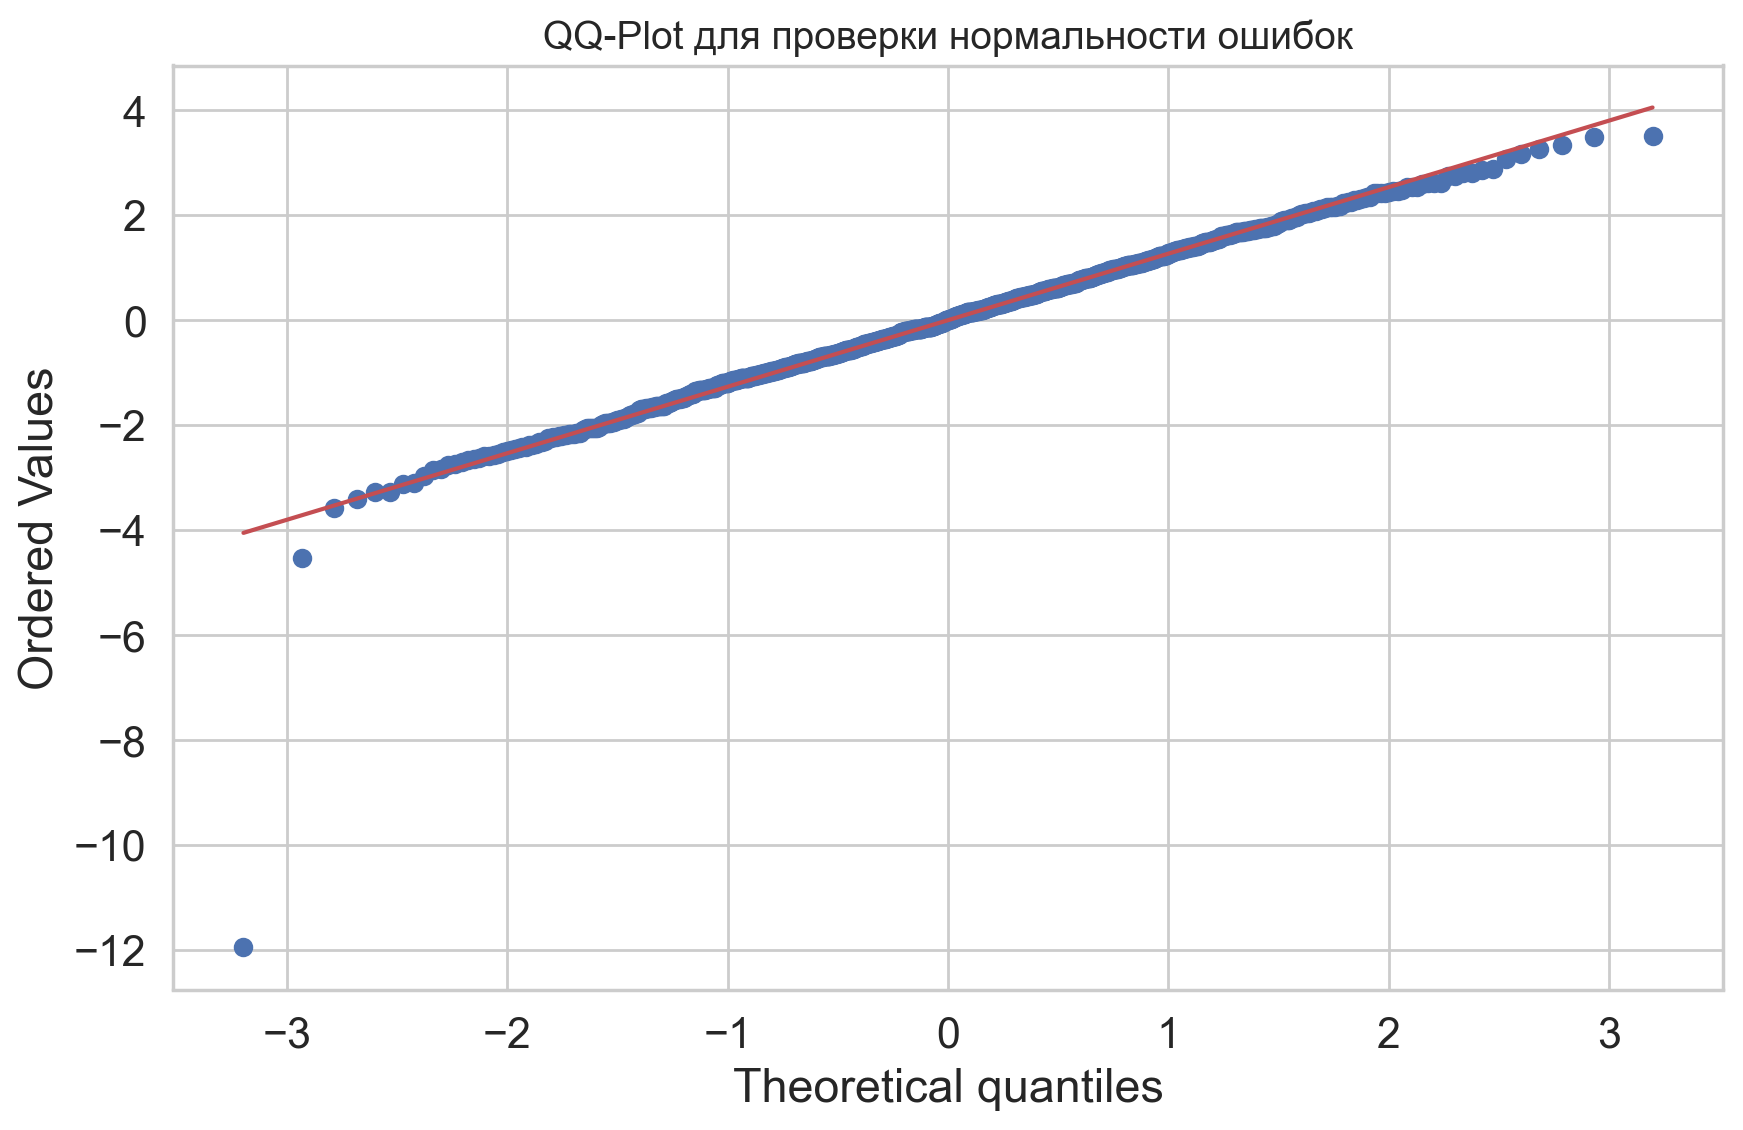

In [126]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-Plot для проверки нормальности ошибок", fontsize=14)
plt.grid(True)
plt.show()

Я буду использовать QQ-plot, так как мне кажется, что это наиболее наглядный инструмент. На графике видно, что точки по большей части лежат на прямой, но естьнесколько точек, которые отклоняются от прямой (одна вообще очень вдалике от прямой). Поэтому можно сказать, что в данных есть выбросы. Но за исключением этих выбросов точки лежат на диагонали, поэтому можно сказать, что ошибки распределены нормально.

Бонусная часть (+5 баллов):

Возможно измерения в задаче содержат разные аномалии, что плохо скажется на оценке наименьших квадратов. Попробуйте применить знания из предыдущей домашки о робастных оценках и построить оценку с BP выше нуля. Такие методы называются "робастной регрессией", но определение M-оценки в них то же, что и в обычной робастной статистике.

#### 3. Оцените дисперсию ошибки показаний датчика.

Найдите оценку дисперсии ошибка приращения расстояния $\varepsilon_i$. По ней найдите оценку дисперсию ошибки отсчёта времени $\varepsilon_i^t$.

Для $i = 1, \ldots, n$ $ \varepsilon_i$ это ошибка приращения расстояния, то есть  $\varepsilon_i = \varepsilon_i^t \beta_2,$ где $\varepsilon_i^t$ --- ошибка отсчета времени, поэтому $ \varepsilon^t_i \sim \mathcal{N}(0, \frac{\sigma^2}{\beta_2^2})$

Так как $Var(\varepsilon_i) = Var (\varepsilon_i^t \beta_2)$, значит, $Var(\varepsilon_i) = \beta_2^2 Var (\varepsilon_i^t )$, значит, дисперсию ошибки отсчета времени можно выразить как $\sigma^2_t = \frac{\sigma^2}{\beta_2^2}$, а оценку дисперсии отсчета врменеи: $\hat{\sigma^2_t} = \frac{\hat{\sigma^2}}{\hat{\beta_2^2}}$

In [127]:
sigma_t_squared_hat = sigma_squared_hat / (beta_2_hat**2)
print(f"Оценка скорости: {beta_2_hat:.4f}")
print(f"Несмещенная оценка дисперсии ошибки: {sigma_squared_hat:.4f}")
print(f"Оценка дисперсии ошибки отсчета времени: {sigma_t_squared_hat:.4f}")

Оценка скорости: 11.9588
Несмещенная оценка дисперсии ошибки: 1.6670
Оценка дисперсии ошибки отсчета времени: 0.0117


#### 4. Измерьте качество модели

In [128]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = Z @ theta_hat  

y_true = X_star

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")


MAE: 1.0011
RMSE: 1.2898
R^2: 0.7464


Для измерения качества модели я использовала 3 метрики: MAE, RMSE, $R^2$. В целом, метрики достаточно хорошие (ошибки относительно невелики). Значение коэффициента детерминации 0.7, не самое лучшее, конечно, но тоже неплохо. Дмуаю, выбросы влияют на эти показатели. 

В этой задаче я построила модель регрессии. Вначале я просто посмотрела на данные и поняла, что модель линейной регрессии применить можно. Судя по метрикам, модель достаточно неплохо справляется с задачей. С помощью МНК я смогла оценить начальное расстояние и скорость трамвая. На графике ошибок не видно никаких закономерностей, модель линейной регрессии подходит для поиска значений. Можно также заметить, что в данных есть выбросы, которые влияют на результат (но не сильно). 

## Задача 2 (5 баллов)

Непараметрическая регрессия и метод Надарая-Ватсона.

Иногда вытаскивать информативные признаки из данных сложно, а регрессию делать хочется. Тогда можно построить нечто похожее на ядерную оценку плотности, но для регрессионной задачи. Она основана на вычислении значения в новой точке по значениям в соседних точках (похожее Вы видели на курсе машинного обучения, но для классификации и без статистики).

Изучите формулу Надарая-Ватсона из статьи на википедии: https://en.wikipedia.org/wiki/Kernel_regression

1) Сгенерируйте выборку для линейной регрессии руками (использовать реальные данные может быть нецелесообразно из-за проблем с визуализацией результата и проклятия размерностей).

Пусть в модели будет одна фича $x$ и по ней вычисляется отклик $y = ax + b + \varepsilon$, где ошибка независима и нормальна, а параметры $a$ и $b$ выберите сами.

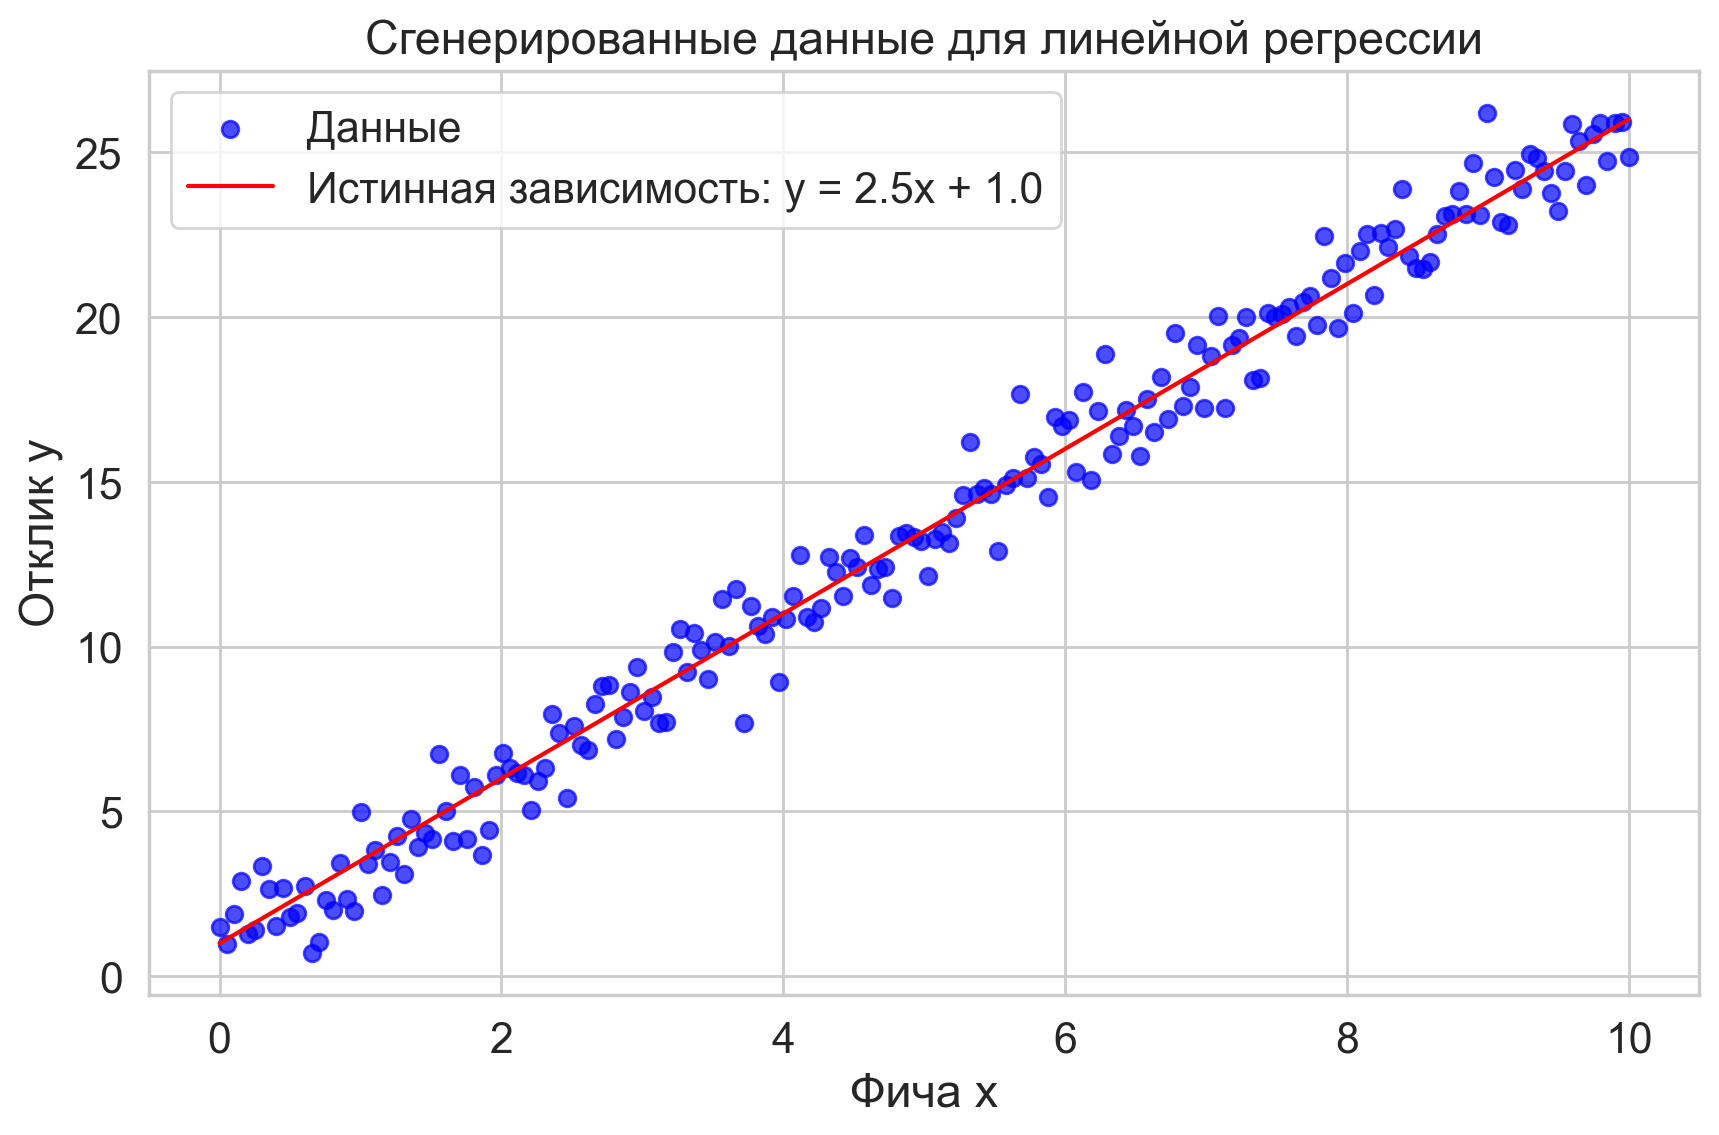

In [129]:
import numpy as np
import matplotlib.pyplot as plt

a = 2.5  
b = 1.0 
n = 200  
sigma = 1.0 

np.random.seed(42) 
x = np.linspace(0, 10, n) 
errors = np.random.normal(0, sigma, n)
y = a * x + b + errors 

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Данные')
plt.plot(x, a * x + b, color='red', label=f'Истинная зависимость: y = {a}x + {b}')
plt.title('Сгенерированные данные для линейной регрессии')
plt.xlabel('Фича x')
plt.ylabel('Отклик y')
plt.grid(True)
plt.legend()
plt.show()


На этом этапе я пока не вводила никаких X_train и X_test (чтобы полностью представить их в следующем пункте). Пока что я просто использовала x и y. На графике синими точками обозначены данные, а красной линией зависимость y = ax + b.

Сгенерируйте тестовую выборку тем же способом и посчитайте отклик из формулы Надарая-Ватсона для хотя бы трёх разных ядер (примеры ядер: https://en.wikipedia.org/wiki/Kernel_(statistics)). Сравните ошибки.

Вот теперь я уже ввожу X_test и X_train, также я поменяла значение sgima с 100 до 200, и попробовала разные значения h (1, 0.7 и 0.5 и остановилась на 0.5), так как так лучше видны различия между ядрами.

В качестве ядер я буду рассматривать:

gaussian_kernel: $K(u) = \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{u^2}{2}\right)$, 

uniform_kernel: $K(u) = 
\begin{cases} 
0.5, & \text{если } |u| \leq 1, \\ 
0, & \text{если } |u| > 1.
\end{cases}$ 

triangular_kernel: $K(u) = 
\begin{cases} 
1 - |u|, & \text{если } |u| \leq 1, \\ 
0, & \text{если } |u| > 1.
\end{cases}$ 

Оценку отклика $\hat{y}(x)$ в новой точке x я вычисляю как:
$\hat{y}(x) = \frac{\sum_{i=1}^n K\left(\frac{x - x_i}{h}\right) y_i}{\sum_{i=1}^n K\left(\frac{x - x_i}{h}\right)},$
где:
$x_i$ — точки обучающей выборки,$y_i$ — отклик в точке $x_i$, $K(u)$ — ядровая функция, которая задает веса, $h > 0$ — ширина ядра, параметр сглаживания.


Для сравнения я изобразила вначале все три ядра на одном графике, чтобы визульно можно было их сравнить. А затем я рассмотрела каждое ядро в отдельности. Можно заметить, что линия равномерного ядра (зеленая) идет не плавно, а скачками. Это связано с резким разделением точек по весам, точки, которые попали в определенную окрестность, получают вес 0.5, а не попавшие - 0.  У треугольного ядра ситуация должна быть лучше, разделение уже не такое резкое, а скорее более плавное, вес уменьшая линейно с увеличением расстояния. А вот гауссово ядро самое лучшее, вес уменьшается плавно по мере удаления точки. В теории это все логично, и на графиках различия тоже видны (но не так очевидно). Видна скачкообразная структура равномерного ядра, также видны различия между треугольным ядром и гауссовым ядром. Можно сделать вывод, что самое гладкое ядро - гауссово, затем идет треугольное и в конце равномерное. Однако вычислительно самое выгодное ядро - равномерное. Но также стоит отметить, что локально треугольное ядро лучше, чем гауссово, и это будет дальше хорошо видно на графиках синуса, где линия треугольного ядра будет ближе всего к пунктирной. 

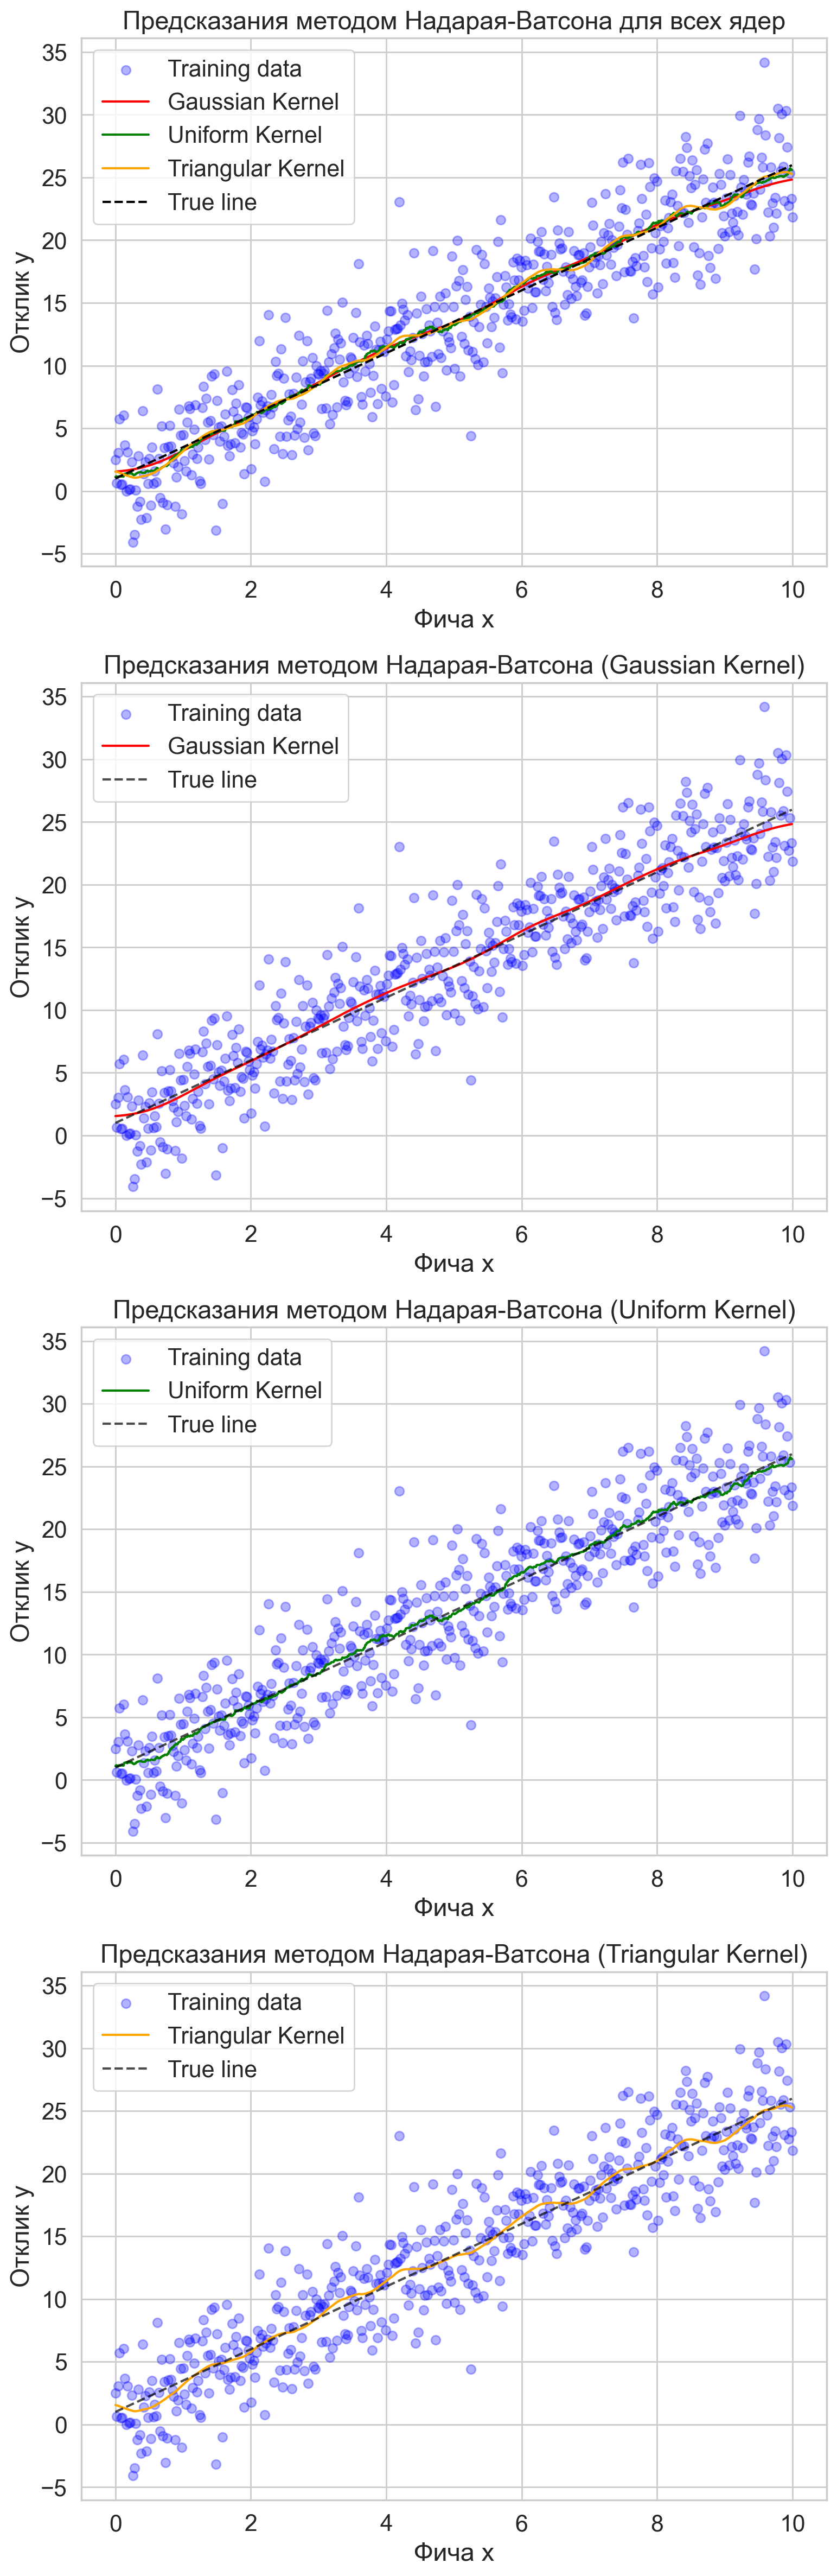

In [130]:
def gaussian_kernel(u):
    return np.exp(-0.5 * u ** 2) / np.sqrt(2 * np.pi)

def uniform_kernel(u):
    return 0.5 * (np.abs(u) <= 1)

def triangular_kernel(u):
    return (1 - np.abs(u)) * (np.abs(u) <= 1)

def nadaraya_watson(x_train, y_train, x_test, kernel, h):
    y_pred = []
    for x in x_test:
        weights = kernel((x - x_train) / h)
        y_pred.append(np.sum(weights * y_train) / np.sum(weights))
    return np.array(y_pred)

n_train = 500
h = 0.5
sigma = 3.0 

np.random.seed(42)
x_train = np.linspace(0, 10, n_train)
errors_train = np.random.normal(0, sigma, n_train)
y_train = a * x_train + b + errors_train

x_grid = np.arange(0, 10, 0.01)

y_grid_gaussian = nadaraya_watson(x_train, y_train, x_grid, gaussian_kernel, h)
y_grid_uniform = nadaraya_watson(x_train, y_train, x_grid, uniform_kernel, h)
y_grid_triangular = nadaraya_watson(x_train, y_train, x_grid, triangular_kernel, h)

y_true = a * x_grid + b

plt.figure(figsize=(8, 24))

plt.subplot(4, 1, 1)
plt.scatter(x_train, y_train, label="Training data", alpha=0.3, color="blue")
plt.plot(x_grid, y_grid_gaussian, label="Gaussian Kernel", color="red")
plt.plot(x_grid, y_grid_uniform, label="Uniform Kernel", color="green")
plt.plot(x_grid, y_grid_triangular, label="Triangular Kernel", color="orange")
plt.title("Предсказания методом Надарая-Ватсона для всех ядер")
plt.plot(x_grid, y_true, label="True line", color="black", linestyle="dashed")
plt.xlabel("Фича x")
plt.ylabel("Отклик y")
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 2)
plt.scatter(x_train, y_train, label="Training data", alpha=0.3, color="blue")
plt.plot(x_grid, y_grid_gaussian, label="Gaussian Kernel", color="red")
plt.plot(x_grid, y_true, label="True line", color="black", linestyle="dashed",  alpha=0.7)
plt.title("Предсказания методом Надарая-Ватсона (Gaussian Kernel)")
plt.xlabel("Фича x")
plt.ylabel("Отклик y")
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 3)
plt.scatter(x_train, y_train, label="Training data", alpha=0.3, color="blue")
plt.plot(x_grid, y_grid_uniform, label="Uniform Kernel", color="green")
plt.plot(x_grid, y_true, label="True line", color="black", linestyle="dashed",  alpha=0.7)
plt.title("Предсказания методом Надарая-Ватсона (Uniform Kernel)")
plt.xlabel("Фича x")
plt.ylabel("Отклик y")
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 4)
plt.scatter(x_train, y_train, label="Training data", alpha=0.3, color="blue")
plt.plot(x_grid, y_grid_triangular, label="Triangular Kernel", color="orange")
plt.plot(x_grid, y_true, label="True line", color="black", linestyle="dashed",  alpha=0.7)
plt.title("Предсказания методом Надарая-Ватсона (Triangular Kernel)")
plt.xlabel("Фича x")
plt.ylabel("Отклик y")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Визуализируйте Ваши предсказания (постройте кривую предсказаний по сетке x с шагом 0.01)

Построила выше.

Заметим, что мы нигде не оценивали сами параметры, но смогли решить финальную задачу -- предсказывать $y$ по $x$.

А теперь поймём, что для этого не нужна линейность.

Проделайте рассуждения выше для нелинейных зависимостей ($y = sin(kx), y = log(x), y = x^k$. Постройте графики предсказаний и сравните их с истинными функциями.

Тут я снова поменяла sigma (чтобы графики были визуально более приятными). На первом графике я изобразила все три ядра, а затем уже каждое ядро в отдельности. Тут также видна скачкообразная структура равномерного ядра, видно, что гауссово ядро самое плавное, но при этом оно находится дальше всего от пунктирной линии (из-за слишком сильного сглаживания). 

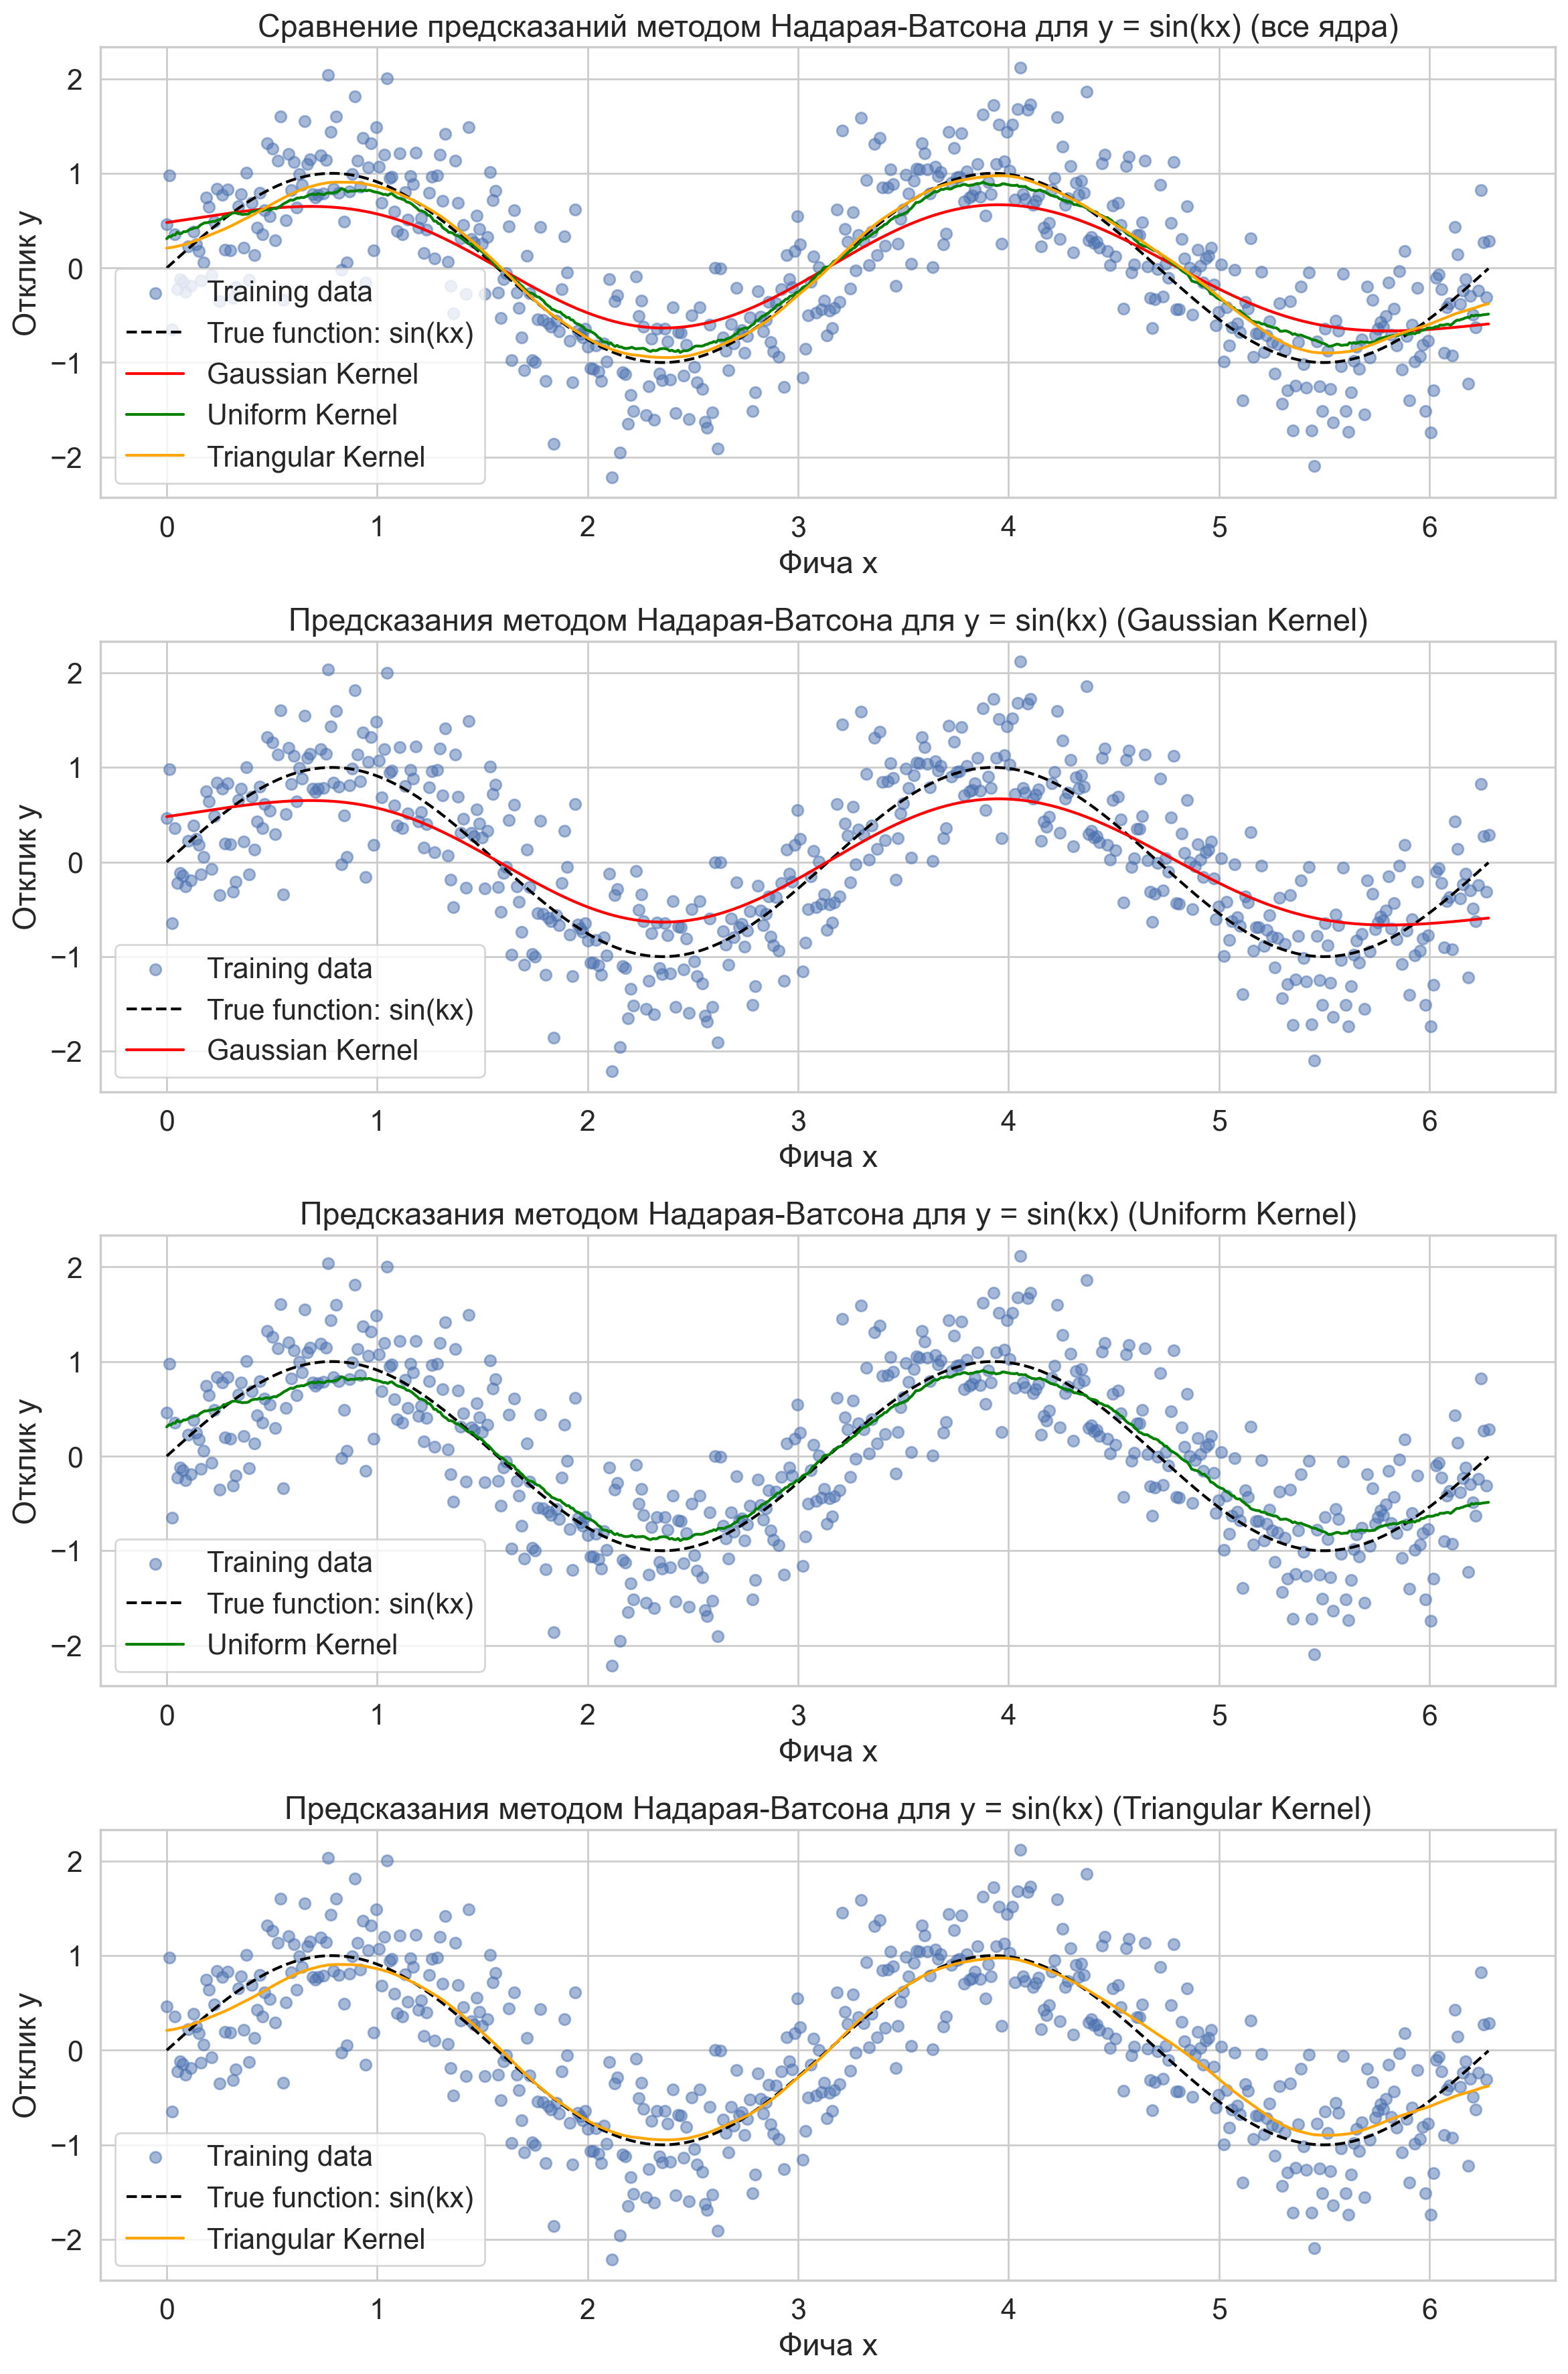

In [131]:
sigma = 0.5
k = 2  

x_train = np.linspace(0, 2 * np.pi, n_train)
y_train = np.sin(k * x_train) + np.random.normal(0, sigma, n_train)
x_grid = np.arange(0, 2 * np.pi, 0.01)

y_pred_gaussian = nadaraya_watson(x_train, y_train, x_grid, gaussian_kernel, h)
y_pred_uniform = nadaraya_watson(x_train, y_train, x_grid, uniform_kernel, h)
y_pred_triangular = nadaraya_watson(x_train, y_train, x_grid, triangular_kernel, h)

fig, axes = plt.subplots(4, 1, figsize=(12, 18))

axes[0].scatter(x_train, y_train, alpha=0.5, label="Training data")
axes[0].plot(x_grid, np.sin(k * x_grid), label="True function: sin(kx)", color="black", linestyle="dashed")
axes[0].plot(x_grid, y_pred_gaussian, label="Gaussian Kernel", color="red")
axes[0].plot(x_grid, y_pred_uniform, label="Uniform Kernel", color="green")
axes[0].plot(x_grid, y_pred_triangular, label="Triangular Kernel", color="orange")
axes[0].set_title("Сравнение предсказаний методом Надарая-Ватсона для y = sin(kx) (все ядра)")
axes[0].set_xlabel("Фича x")
axes[0].set_ylabel("Отклик y")
axes[0].legend()
axes[0].grid(True)

axes[1].scatter(x_train, y_train, alpha=0.5, label="Training data")
axes[1].plot(x_grid, np.sin(k * x_grid), label="True function: sin(kx)", color="black", linestyle="dashed")
axes[1].plot(x_grid, y_pred_gaussian, label="Gaussian Kernel", color="red")
axes[1].set_title("Предсказания методом Надарая-Ватсона для y = sin(kx) (Gaussian Kernel)")
axes[1].set_xlabel("Фича x")
axes[1].set_ylabel("Отклик y")
axes[1].legend()
axes[1].grid(True)

axes[2].scatter(x_train, y_train, alpha=0.5, label="Training data")
axes[2].plot(x_grid, np.sin(k * x_grid), label="True function: sin(kx)", color="black", linestyle="dashed")
axes[2].plot(x_grid, y_pred_uniform, label="Uniform Kernel", color="green")
axes[2].set_title("Предсказания методом Надарая-Ватсона для y = sin(kx) (Uniform Kernel)")
axes[2].set_xlabel("Фича x")
axes[2].set_ylabel("Отклик y")
axes[2].legend()
axes[2].grid(True)

axes[3].scatter(x_train, y_train, alpha=0.5, label="Training data")
axes[3].plot(x_grid, np.sin(k * x_grid), label="True function: sin(kx)", color="black", linestyle="dashed")
axes[3].plot(x_grid, y_pred_triangular, label="Triangular Kernel", color="orange")
axes[3].set_title("Предсказания методом Надарая-Ватсона для y = sin(kx) (Triangular Kernel)")
axes[3].set_xlabel("Фича x")
axes[3].set_ylabel("Отклик y")
axes[3].legend()
axes[3].grid(True)

plt.tight_layout()
plt.show()


Теперь построю аналогичные графики для логарифма. Как мне кажется, все различия между ядрами лучше всего видны на графике синуса, и новой информации из графика логарифма я не вижу, поэтому график для степени я строить не буду. 

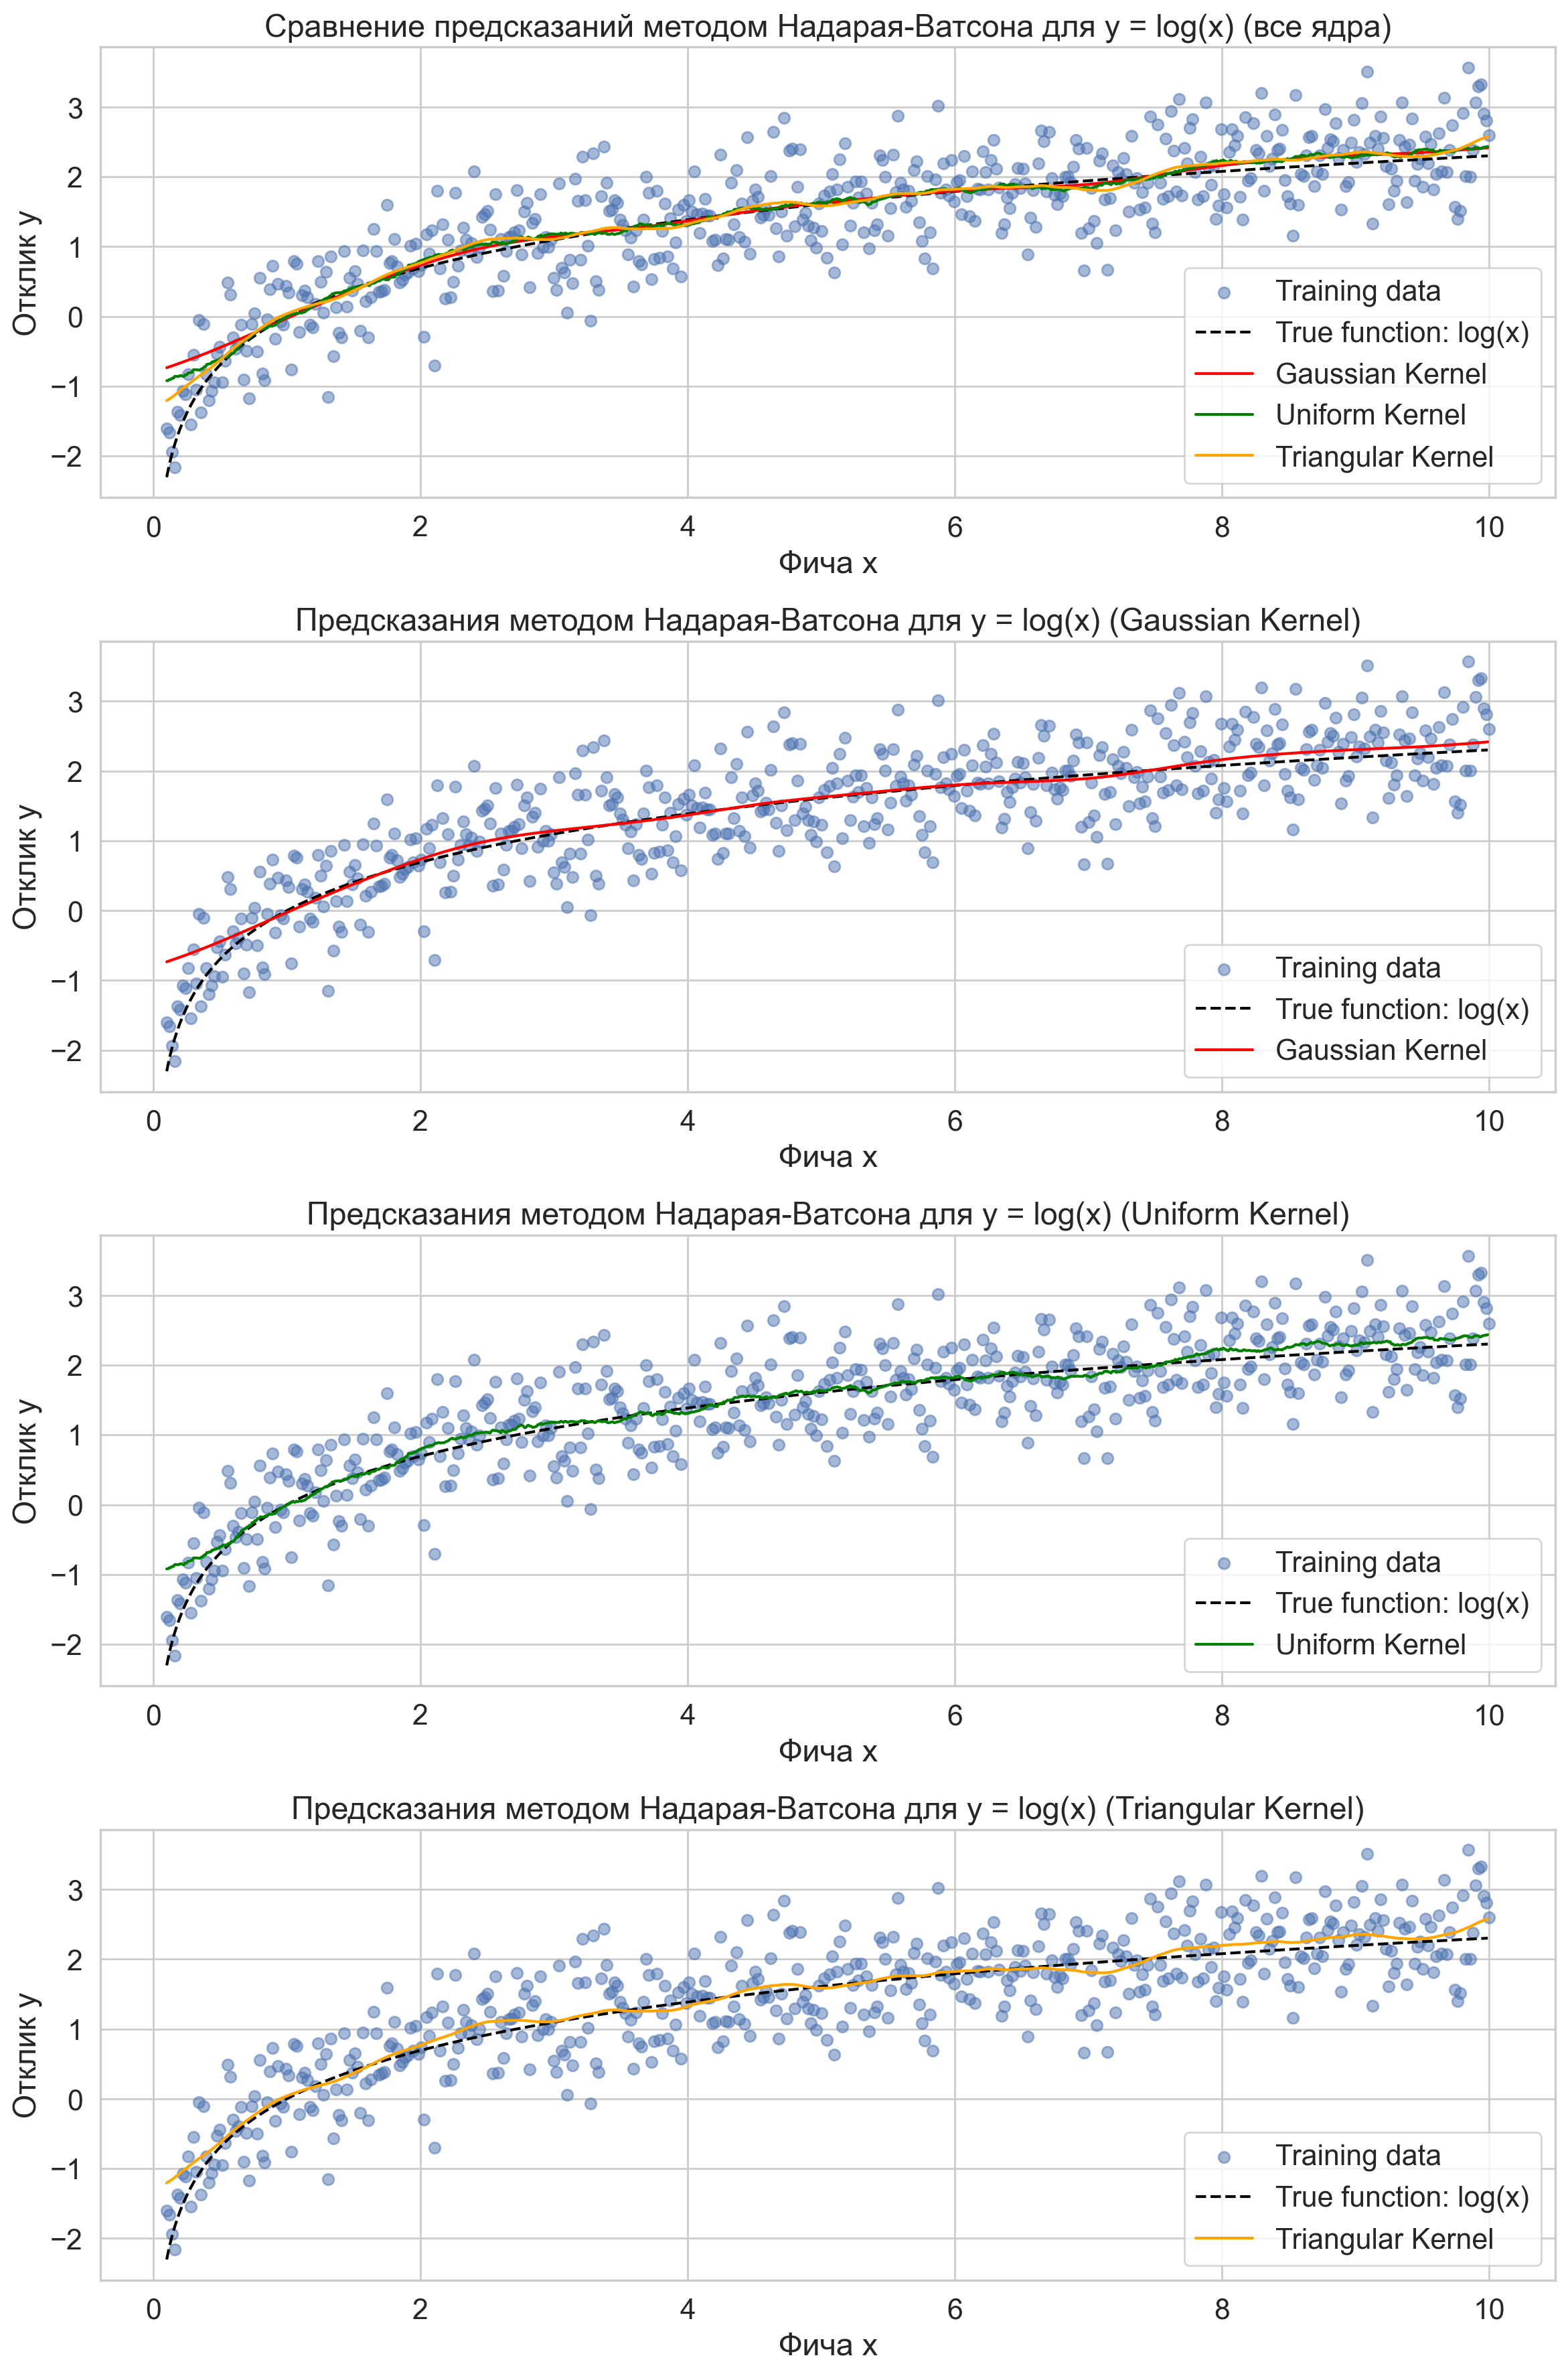

In [132]:
sigma = 0.5
x_train = np.linspace(0.1, 10, n_train)  
y_train = np.log(x_train) + np.random.normal(0, sigma, n_train)  
x_grid = np.arange(0.1, 10, 0.01)

y_pred_gaussian = nadaraya_watson(x_train, y_train, x_grid, gaussian_kernel, h)
y_pred_uniform = nadaraya_watson(x_train, y_train, x_grid, uniform_kernel, h)
y_pred_triangular = nadaraya_watson(x_train, y_train, x_grid, triangular_kernel, h)

fig, axes = plt.subplots(4, 1, figsize=(12, 18))

axes[0].scatter(x_train, y_train, alpha=0.5, label="Training data")
axes[0].plot(x_grid, np.log(x_grid), label="True function: log(x)", color="black", linestyle="dashed")
axes[0].plot(x_grid, y_pred_gaussian, label="Gaussian Kernel", color="red")
axes[0].plot(x_grid, y_pred_uniform, label="Uniform Kernel", color="green")
axes[0].plot(x_grid, y_pred_triangular, label="Triangular Kernel", color="orange")
axes[0].set_title("Сравнение предсказаний методом Надарая-Ватсона для y = log(x) (все ядра)")
axes[0].set_xlabel("Фича x")
axes[0].set_ylabel("Отклик y")
axes[0].legend()
axes[0].grid(True)

axes[1].scatter(x_train, y_train, alpha=0.5, label="Training data")
axes[1].plot(x_grid, np.log(x_grid), label="True function: log(x)", color="black", linestyle="dashed")
axes[1].plot(x_grid, y_pred_gaussian, label="Gaussian Kernel", color="red")
axes[1].set_title("Предсказания методом Надарая-Ватсона для y = log(x) (Gaussian Kernel)")
axes[1].set_xlabel("Фича x")
axes[1].set_ylabel("Отклик y")
axes[1].legend()
axes[1].grid(True)

axes[2].scatter(x_train, y_train, alpha=0.5, label="Training data")
axes[2].plot(x_grid, np.log(x_grid), label="True function: log(x)", color="black", linestyle="dashed")
axes[2].plot(x_grid, y_pred_uniform, label="Uniform Kernel", color="green")
axes[2].set_title("Предсказания методом Надарая-Ватсона для y = log(x) (Uniform Kernel)")
axes[2].set_xlabel("Фича x")
axes[2].set_ylabel("Отклик y")
axes[2].legend()
axes[2].grid(True)

axes[3].scatter(x_train, y_train, alpha=0.5, label="Training data")
axes[3].plot(x_grid, np.log(x_grid), label="True function: log(x)", color="black", linestyle="dashed")
axes[3].plot(x_grid, y_pred_triangular, label="Triangular Kernel", color="orange")
axes[3].set_title("Предсказания методом Надарая-Ватсона для y = log(x) (Triangular Kernel)")
axes[3].set_xlabel("Фича x")
axes[3].set_ylabel("Отклик y")
axes[3].legend()
axes[3].grid(True)

plt.tight_layout()
plt.show()


**Вывод:** Из всех построенных графиков синус лучше всего показывает различия между ядрами. Видно, что гауссово ядро самое плавное, но при этом "самое далекое" от пунктирной линии (но кстати на линейной функции и на логарифме это, как мне кажется, визуально имеет не такое большое значение). Затем по плавности идет треугольное распределение, затем равномерное. 

Можете попробовать применить метод Надарая-Ватсона для выборки из задачи 3 и посмотреть, что получится (0 баллов)

## Задача 3 (15 баллов)

Теперь давайте попрактикуемся в решении задач на реальных данных. Мы будем анализировать рынок недвижимости 🏘. Данные возьмем из [соревнования](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) на платформе kaggle. В отличие от соревнований нас будут интересовать зависимости в данных, а не более точные предсказания.

![](https://storage.yandexcloud.net/miptstats-public-files/pictures/housesbanner.png)

В частности мы будем смотреть на влияние различных признаков на стоимость дома и проверим несколько гипотез.

In [133]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1wphoJPm4LA3-Mo_l7TRsq9uRdXkzCJqe

Downloading...
From: https://drive.google.com/uc?id=1wphoJPm4LA3-Mo_l7TRsq9uRdXkzCJqe
To: C:\Users\natas\PycharmProjects\math_stat_homework\train.csv

  0%|          | 0.00/461k [00:00<?, ?B/s]
100%|##########| 461k/461k [00:00<00:00, 665kB/s]
100%|##########| 461k/461k [00:00<00:00, 665kB/s]


In [134]:
from scipy import stats as sps

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [135]:
df = pd.read_csv("train.csv")

df.fillna("NA", inplace=True)
df.head()

C:\Users\natas\AppData\Local\Temp\ipykernel_13528\1664368884.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'NA' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("NA", inplace=True)


Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL        65.0     8450   Pave    NA      Reg   
1   2          20       RL        80.0     9600   Pave    NA      Reg   
2   3          60       RL        68.0    11250   Pave    NA      IR1   
3   4          70       RL        60.0     9550   Pave    NA      IR1   
4   5          60       RL        84.0    14260   Pave    NA      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
1         Lvl    AllPub  ...        0     NA    NA          NA       0      5   
2         Lvl    AllPub  ...        0     NA    NA          NA       0      9   
3         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
4         Lvl    AllPub  ...        0     NA    NA          NA       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [136]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Можно заметить, что в данных присутствуют категориальные признаки, которые при этом не лишены порядка.

Вспомните курс машинного обучения. Как можно обработать категориальные призаки, чтобы регрессионная модель была осмысленна?

Ответ: я буду использовать порядковое кодирование, Ex (Excellent) — лучшее качество, заменю на 4, Gd (Good) — хорошее качество, заменю на 3, TA (Typical/Average) — среднее качество, заменю на 2, Fa (Fair) — худшее качество, заменю на 1.

In [140]:
useful_columns = [
    "OverallQual",
    "GrLivArea",
    "ExterQual",
    "KitchenQual",
    "GarageArea",
    "PoolArea",
    "BsmtQual",
    "TotalBsmtSF",
    "GarageFinish",
    "SalePrice"
]
filtered_df = df[useful_columns]

In [141]:
filtered_df['ExterQual'] = filtered_df['ExterQual'].replace({'Ex':4,'Gd':3, 'TA':2, 'Fa':1})
filtered_df['KitchenQual'] = filtered_df['KitchenQual'].replace({'Ex':4,'Gd':3, 'TA':2, 'Fa':1})
filtered_df['BsmtQual'] = filtered_df['BsmtQual'].replace({'Ex':5,'Gd':4, 'TA':3, 'Fa':2, 'NA':1})
filtered_df['GarageFinish'] = filtered_df['GarageFinish'].replace({'Fin':4,'RFn':3, 'Unf':2, 'NA':1})
filtered_df

C:\Users\natas\AppData\Local\Temp\ipykernel_13528\3611727344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ExterQual'] = filtered_df['ExterQual'].replace({'Ex':4,'Gd':3, 'TA':2, 'Fa':1})
C:\Users\natas\AppData\Local\Temp\ipykernel_13528\3611727344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['KitchenQual'] = filtered_df['KitchenQual'].replace({'Ex':4,'Gd':3, 'TA':2, 'Fa':1})
C:\Users\natas\AppData\Local\Temp\ipykernel_13528\3611727344.py:3: SettingWithCopyWarning: 
A va

OverallQual  GrLivArea  ExterQual  KitchenQual  GarageArea  PoolArea  \
0               7       1710          3            3         548         0   
1               6       1262          2            2         460         0   
2               7       1786          3            3         608         0   
3               7       1717          2            3         642         0   
4               8       2198          3            3         836         0   
...           ...        ...        ...          ...         ...       ...   
1455            6       1647          2            2         460         0   
1456            6       2073          2            2         500         0   
1457            7       2340          4            3         252         0   
1458            5       1078          2            3         240         0   
1459            5       1256          3            2         276         0   

      BsmtQual  TotalBsmtSF  GarageFinish  SalePrice  
0            4          856             3     208500  
1            4         1262             3     181500  
2            4          920             3     223500  
3            3          756             2     140000  
4            4         1145             3     250000  
...        ...          ...           ...        ...  
1455         4          953             3     175000  
1456         4         1542             2     210000  
1457         3         1152             3     266500  
1458         3         1078             2     142125  
1459         3         1256             4     147500  

[1460 rows x 10 columns]

### Визуализируйте данные

Перед тем, как начать использовать линейные модели необходимо убедиться в том, что столбцы признаков не слишком коллинеарны. Для этого можно использовать [корреляцию Пирсона](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#For_a_sample). Используя ``sns.heatmap`` постройте "тепловую карту" попарных корреляций признаков. Для того, чтобы увидеть числовые значения корреляций используйте ``annot=True``. Сделайте размер графика алекватным, например, ``figsize=(11, 10)``.

Какие признаки Вам кажутся самыми полезными? Выберите 9-10 признаков (пока на основании логики) и визуализируйте только их.

Можете использовать предложенные нами:

useful_columns = [
    "OverallQual",
    "GrLivArea",
    "ExterQual",
    "KitchenQual",
    "GarageArea",
    "PoolArea",
    "BsmtQual",
    "TotalBsmtSF",
    "GarageFinish",
    "SalePrice"
]

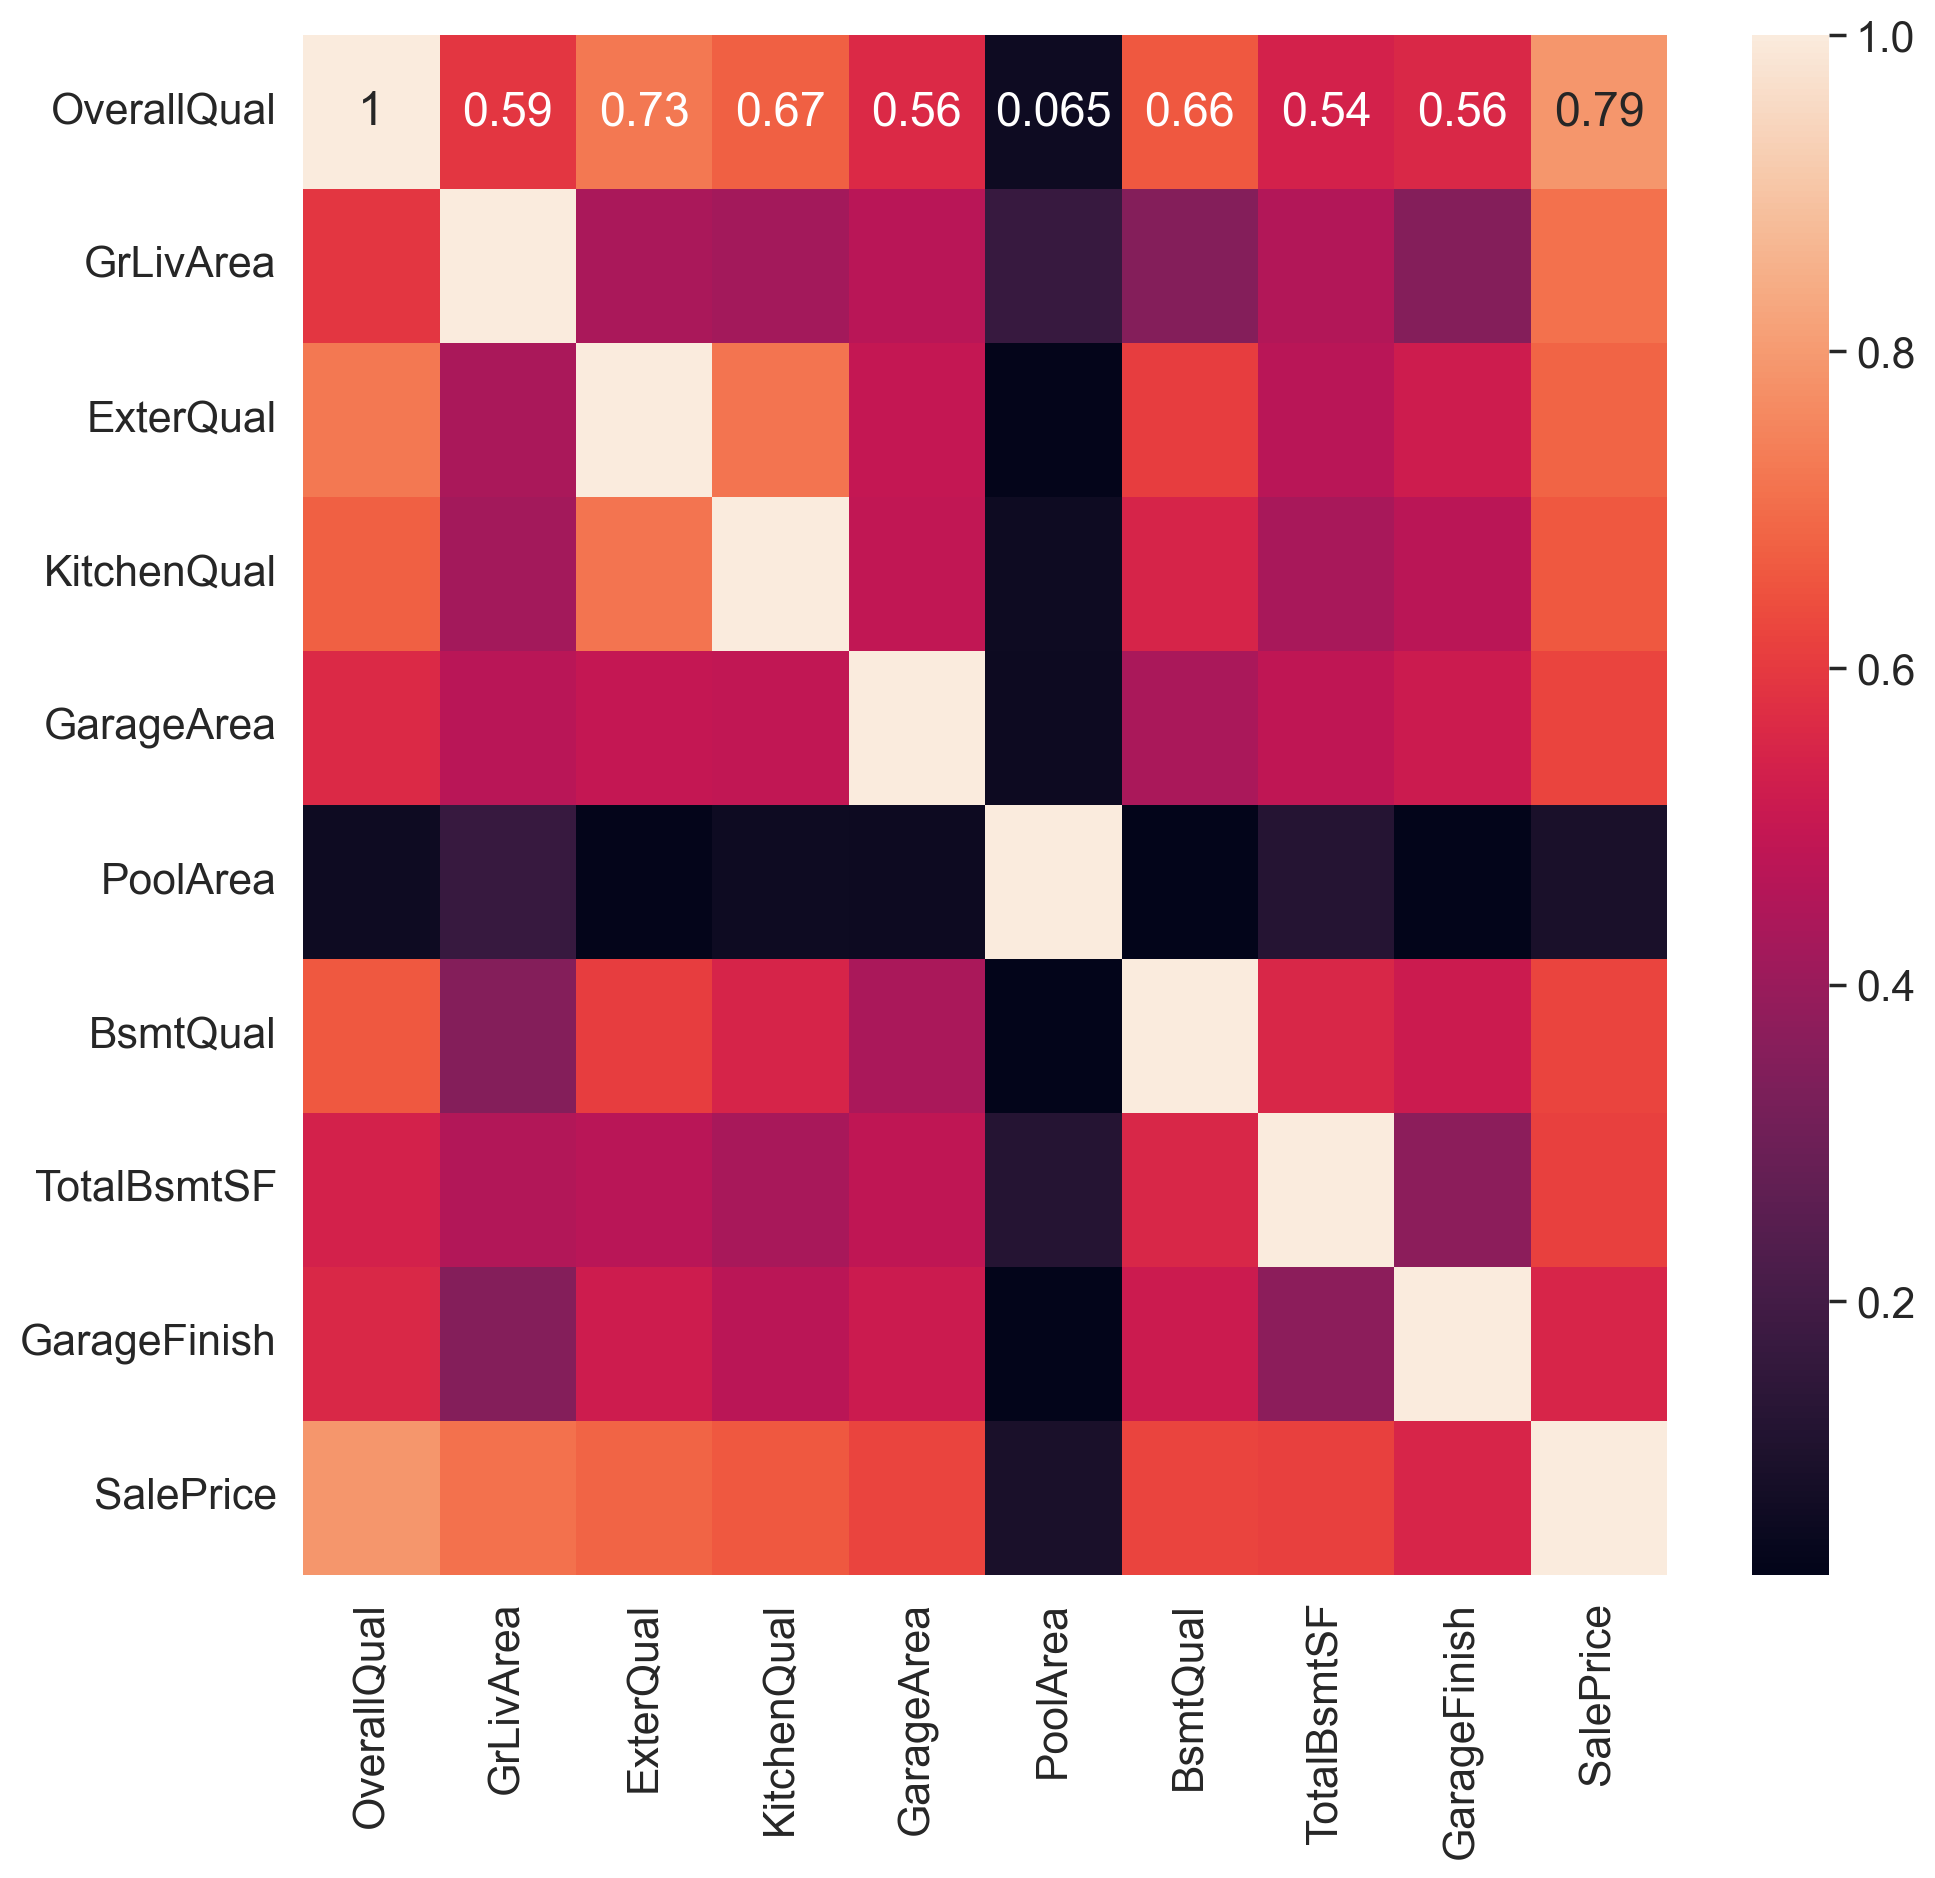

In [142]:
plt.figure(figsize=(11, 10))
sns.heatmap(filtered_df.corr(), annot=True)
plt.show()

Изучите карту и сделайте по ней выводы о зависимости в данных ($|r_{XY}| > 0.9$). А чем плохи зависимые признаки? Для ответа на последний вопрос напишите чему равно аналитическое решение задачи регрессии.

**Ответ:**

Удалите, если требуется, один из двух скоррелированных признаков в ячейке ниже.

Давайте подробнее изучим взаимодействие признаков. Построим матрицу. На диагонале $a_{ii} = d_i$ этой матрицы построим гистограммы для $i$-го признака. На остальных позициях $a_{ij}$ будут располагаться scatterplot в осях признака $i$ по $x$ и признака $j$ по $y$. Для этого можно использовать метод из pandas ``pd.plotting.scatter_matrix``.

Сделайте вывод о данных. Опишите, нужна ли регуляризация и почему?

### Как пользоваться линейными моделями

Как можно догадаться, на практике никто не пишет заново свои линейные модели. Для машинного обучения часто используют библиотеку scikit learn, для аналитики statsmodels. С первой вы познакомитесь (или уже познакомились) на курсе по ML, мы же сконцентрируемся на второй.

Итак, библиотека statsmodels состоит из множества реализованных критериев и, как ни странно, статистических моделей. Основным плюсом является то, что нам не нужно реализовывать критериии вручную, все сделано за нас (это не значит что думать не надо!).

Начнем с линейной модели: для того, чтобы ее создать понадобится лишь одна строка.  Как видно в ячейке ниже мы задаем формулу того, какую модель мы хотим получить. В данном случае мы хотим предсказать ``SalePrice`` по взвешенной сумме из остальных признаков.

In [ ]:
formula = "SalePrice ~ " + " + ".join(useful_columns[:-1])

print(formula)

SalePrice ~ OverallQual + GrLivArea + ExterQual + KitchenQual + GarageArea + PoolArea + BsmtQual + TotalBsmtSF + GarageFinish


Теперь эту формулу мы просто передаем в модель, а так же подаем ей данные. В формуле написаны имена колонок из ``filtered_df``.

In [ ]:
simple_model = smf.ols(formula, data=filtered_df)

fitted_simple_model = simple_model.fit()

print(fitted_simple_model.summary())

### Гетероскедастичность ошибки

**гомоскедастичностью** называют свойство одинаковости дисперсии и независимость остатков модели.

Оценка, полученная с помощью гауссовской линейной модели будет справедлива лишь при выполнении условия гомоскедастичности остатков. Для проверки на гомоскедастичность часто используют критерий Бройша — Пагана. Мы не будем вдаваться в детали и доказательство того, что критерий валидный и работает правильно. Итак, критерий Бройша — Пагана проверяет нулевую гипотезу о гомоскедастичности распределения данных против альтернативы, то есть гетероскедастичности. Если нулевая гипотеза отвергается то можно сказать, что данные распределены ГЕТЕРОскедастично. Мы этого не хотим.

Критерий реализован с помощью функции ``sms.diagnostic.het_breuschpagan``. Документацию можно найти [здесь](https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.het_breuschpagan.html).

Остатки модели можно из поля ``fitted_model.resid``, а параметры из ``fitted_model.model.exog``.

Нас интересует p-value для множителя Лагранжа.

В ячейке ниже получите уровень достигаемой значимости для критерия Бройша — Пагана.

In [ ]:
p_val_het = sms.diagnostic.het_breuschpagan(resid=fitted_simple_model.resid,
                                            exog_het=fitted_simple_model.model.exog)[1]

print(f"p-value simple: {p_val_het}")

p-value simple: 5.431361130993936e-95


Пока не вдаваясь в проверку гипотез просто будем считать, что критерий точно проверяет условие гомоскедастичности.

Отвергается ли гипотеза о гомоскедастичности остатков (определение из будущего: гипотеза отвергается, если pvalue < 0.05 и это значит, что её утверждение полагается неверным)? Что это означает?

**Ответ:**

В случаях, когда распределения остатков не является гомоскедастичном оценка по-прежнему остается несмещенной, однако стоит сделать некоторую поправку, на более высокую дисперсию. Поэтому значения F-критериев и t-критериев для коэффициентов стоит пересмотреть. Для таких случаев существует достаточно много различных поправок, одно из семейств таких поправок называется поправки Уайта на гетероскедастичность. Ниже мы попробуем использовать одну из поправок.

Для этого, в ячейке ниже, обучите линейную модель, но на этот раз передайте в метод ``.fit`` аргумент ``cov_type="HC1"``.

Получите summary для такой модели.

Проанализируйте результаты. Как изменились показатели из таблицы?

**Ответ:**

Теперь мы действительно можем оценивать то, насколько важен тот или иной признак.



Проведите отбор признаков методами с семинара. Начните с того, что выберите около 15 признаков, которые Вам кажутся разумными и отберите лучшие 3, 5 и 10 из них.

Какие признаки оказались не значимы и почему?

**Ответ:**

Теперь снова обучим новую модель только на значимых признаках и получим summary. Не забудьте про поправку Уайта!

Как изменился коэффициент $R^2$? Всегда ли бОльший $R^2$ говорит о правильной модели? Расскажите о своих рассуждениях!

**Ответ:**

### Преобразование целевого признака

Обратим свое внимание на целевую переменную. Ниже постройте гистограммы для признака ``SalePrice``. А так же для логарифма от ``SalePrice``. Сделайте это на разных картинках. Можно использовать subplot.

Какой из графиков выглядит более "Гауссовским"?

**Ответ:**

Теперь давайте снова посмотрим на распределение остатков от линейной модели. Начертим qqplot для нормального распределения и гистограмму остатков.

Как вы считаете, можно ли сказать, что распределение остатков это нормальное распределение?

**Ответ:**

Давайте обучим модель предсказывать не SalePrice, а ее логарифм. Для этого снова обновим формулу для модели. Прелесть формул в том, что в них можно использовать операции из numpy. Например можно искать зависимость не от ``PoolArea``, а от ее квадрата, то есть ``np.power(PoolArea, 2)``. Достаточно просто добавить в формулу ..." + np.power(PoolArea, 2)" и все заработает!

В ячейке ниже обучите модель предсказывать логарифм SalePrice. Получите summary этой модели.

Как изменился коэффициент R^2? Модель лучше стала понимать данные?

**Ответ:**

Постройте графики, аналогичные тем, что встретились нам на две ячейки выше (qqplot и гистограмму остатков). Но на этот раз для модели, предсказывающией логарифм.

Как вы считаете, стоит ли предсказывать логарифм от цены? В каких случаях это полезно?

**Ответ:**

## Бонусная часть (20 баллов)

Подойдём к задаче регрессии с байесовской точки зрения. Полезно изучить разделы 8.1, 8.2 конспекта Д.П.Вектрова (https://vk.com/doc126754362_500465695?hash=uU7RYUtCmrntB7ynduiZlYgZuR5C4oSnXqB5nXW0DEk&dl=votNcsozZKYk4ZLO546dYTZd17B3eHok2xSVQP6F6ic)

Только в начале дочитайте задание, а потом лезьте в конспект.

Мы Вам предлагаем увидеть, как при помощи байесовского подхода выбрать важные признаки регрессионной модели. Рекомендуем проделать выкладки без "подглядывания" в конспект.

1) Запишите байесовскую постановку задачи регрессии. Не забудьте про априорное распределение -- регуляризацию (пусть она для всех компонент одинаковая). Регуляризовать будем нормальным распределением, более того считать его компоненты независимыми (матрица ковариаций будет диагональна)

2) Каким будет аналитическое решение, если бы мы реализовывали "байес для бедных"? Какую роль играет регуляризация?

3) Теперь, когда Вы выяснили роль регуляризации давайте вместо диагональной матрицы с одинаковыми значениями на диагонали в качестве априорного распределения возьмём разные значения. Как изменится решение? Что произойдёт с теми признаками, у которых априорная дисперсия высокая? А низкая?

4) В вариационном байесовском выводе у Вас появился интересный объект в знаменателе -- интеграл по всему пространству параметров от регуляризированного правдоподобия. Это называется *обоснованностью* параметрической модели. Чем она выше -- тем лучше заданное семейство распределений описывает Ваши данные.

Прочитайте статью на википедии о бритве Оккама и критерии фальсифицируемости Поппера и ещё раз посмотрите на знаменатель. Порассуждайте о том, почему более обоснованные модели выше.

**Ваш философский ответ:**

А теперь откройте главу 8 конспекта Ветрова и изучите алгоритм максимизации обоснованности.

Напишите его.

Изучите дисперсии, которые получатся после 30 итераций (или сколько Вам понадобится для сходимости). Подумайте, почему алгоритм счёл одни признаки полезнее других. Визуализируйте распределение признака и его дисперсию. Сделайте выводы.

**Вывод:**